<a href="https://colab.research.google.com/github/dynasty-29/MyKaggleX_ShowcaseProjects/blob/main/carbon_emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
This Project provides an in-depth look into the global CO2 emissions at the country-level, allowing for a better understanding of how much each country contributes to the global cumulative human impact on climate. It contains information on total emissions as well as from coal, oil, gas, cement production and flaring, and other sources. We also have a breakdown of per capita CO2 emission per country - showing which countries are leading in pollution levels and identifying potential areas where reduction efforts should be concentrated. 



## **Research Areas:**

1. Using the per capita emissions data, develop a reporting system to track countries' progress in meeting carbon emission targets and give policy recommendations for how countries can reach those targets more quickly.
2. Analyze the correlation between different fossil fuel sources and CO2 emissions to understand how best to reduce CO2 emissions at a country-level.
3. Create an interactive map showing global CO2 levels over time that allows users to visualize trends by country or region across all fossil fuel sources


# **Defining the question**
The main objective of the project is to explore the data set and be able to go through the research areas above..

### **Why?**

Predicting a country's carbon footprint is important in the context of climate change because it helps to identify the primary sources of greenhouse gas emissions, which are the main drivers of climate change. By understanding where emissions are coming from, policymakers and individuals can develop targeted strategies to reduce them. For example, if a country's carbon footprint is primarily the result of transportation emissions, investments in electric vehicles or public transportation infrastructure may be prioritized.

### **Metrics for success**
1. Building a model that can be used as a carbon capture technology to predict level of Per capita CO2 Emission (Best model should have the lowest RMSE).
2. Identifying the top CO2 Emiiter countries.
3. Recording experimental design
4. Determine the main objectives
5. Load and preview the dataset.
6. Understand the data.
7. Prepare the dataset - Identify outliers, anomalies, duplicates, missing values, and determine how deal with them etc.
8. Carry out univariate analysis, bivariate analysis, and modelling.
9. Challenge the solution.
10. Conclusion and recommendations


## **Data Source:**
The data was obtained from [Kaggle](https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022) and it consist of the following variables:

    Country:	The name of the country. (String)
    ISO 3166-1 alpha-3:	The three-letter code for the country. (String)
    Year:	The year of the data. (Integer)
    Total:	The total amount of CO2 emissions for the country in the given year. (Float)
    Coal:	The amount of CO2 emissions from coal for the country in the given year. (Float)
    Oil:	The amount of CO2 emissions from oil for the country in the given year. (Float)
    Gas:	The amount of CO2 emissions from gas for the country in the given year. (Float)
    Cement:	The amount of CO2 emissions from cement production for the country in the given year. (Float)
    Flaring:	The amount of CO2 emissions from flaring operations for the country in the given year. (Float)
    Other:	The amount of CO2 emissions from other sources for the country in the given year. (Float)
    Per Capita:	The amount of CO2 emissions per capita for the country in the given year. (Float)

# **Data Wrangling and Cleaning**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading the data sets
df = pd.read_csv('/content/GCB2022v27_MtCO2_flat.csv') 

In [ ]:
#previewing the data set
df.head(3)

Country ISO 3166-1 alpha-3  Year  Total  Coal  Oil  Gas  Cement  \
0  Afghanistan                AFG  1750    0.0   NaN  NaN  NaN     NaN   
1  Afghanistan                AFG  1751    0.0   NaN  NaN  NaN     NaN   
2  Afghanistan                AFG  1752    0.0   NaN  NaN  NaN     NaN   

   Flaring  Other  Per Capita  
0      NaN    NaN         NaN  
1      NaN    NaN         NaN  
2      NaN    NaN         NaN

In [ ]:
#from preview we have data set dating back in 1750 but most of it have the '[NONE]' value
#will drop all the data before 2015 
# with this will aim for when campaign of SDG began
df1 = df[df['Year'] >= 2015]
df1.head()

Country ISO 3166-1 alpha-3  Year      Total      Coal       Oil  \
265  Afghanistan                AFG  2015   9.791093  2.843264  6.624512   
266  Afghanistan                AFG  2016   9.067598  2.878736  5.794097   
267  Afghanistan                AFG  2017   9.867969  3.447824  6.074912   
268  Afghanistan                AFG  2018  10.818048  3.847200  6.620848   
269  Afghanistan                AFG  2019  11.081621  3.954767  6.842956   

          Gas    Cement  Flaring  Other  Per Capita  
265  0.282128  0.041189      0.0    NaN    0.290076  
266  0.318639  0.076126      0.0    NaN    0.261795  
267  0.300448  0.044785      0.0    NaN    0.276852  
268  0.293120  0.056880      0.0    NaN    0.294876  
269  0.245569  0.038329      0.0    NaN    0.293401

In [ ]:
#shape
df1.shape

(1624, 11)

In [ ]:
#data set info
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1624 entries, 265 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             1624 non-null   object 
 1   ISO 3166-1 alpha-3  1582 non-null   object 
 2   Year                1624 non-null   int64  
 3   Total               1624 non-null   float64
 4   Coal                1540 non-null   float64
 5   Oil                 1547 non-null   float64
 6   Gas                 1540 non-null   float64
 7   Cement              1526 non-null   float64
 8   Flaring             1540 non-null   float64
 9   Other               329 non-null    float64
 10  Per Capita          1617 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 152.2+ KB


In [ ]:
#Checcking for null values
df1.isnull().sum()

Country                  0
ISO 3166-1 alpha-3      42
Year                     0
Total                    0
Coal                    84
Oil                     77
Gas                     84
Cement                  98
Flaring                 84
Other                 1295
Per Capita               7
dtype: int64

<AxesSubplot:>

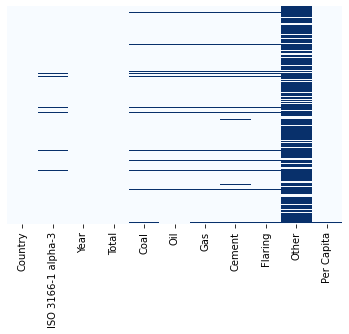

In [ ]:
#visualizing null values
sns.heatmap(df1.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
#We have column 'other' that has more than half of null values
#will drop this column
df2 = df1.drop(['Other'], axis=1)
df2.head(2)

Country ISO 3166-1 alpha-3  Year     Total      Coal       Oil  \
265  Afghanistan                AFG  2015  9.791093  2.843264  6.624512   
266  Afghanistan                AFG  2016  9.067598  2.878736  5.794097   

          Gas    Cement  Flaring  Per Capita  
265  0.282128  0.041189      0.0    0.290076  
266  0.318639  0.076126      0.0    0.261795

In [ ]:
#Will now first check the skewness of the data before dealing with nulls
df2.skew()

Year           0.000000
Total         13.222219
Coal          11.488286
Oil           13.515711
Gas           13.489013
Cement        11.627282
Flaring       13.540076
Per Capita     2.417896
dtype: float64

Checking for skewness before filling null values in a dataset is important because it can help determine the appropriate method for handling the missing data. If the dataset is skewed (like in this case), using the mean or median to fill in null values may not be the best approach, as it can lead to inaccuracies and bias in the final analysis. Instead, other methods such as interpolation.

So for this case will apply interpolation. This is a method of estimating missing values in a dataset by using the known values that surround them.

In [ ]:
#dealing with missing values
#wi
df2['Coal'].interpolate(method='linear', inplace=True)
df2['Oil'].interpolate(method='linear', inplace=True)
df2['Gas'].interpolate(method='linear', inplace=True)
df2['Cement'].interpolate(method='linear', inplace=True)
df2['Flaring'].interpolate(method='linear', inplace=True)
df2['Per Capita'].interpolate(method='linear', inplace=True)
df2.isnull().sum()

Country                0
ISO 3166-1 alpha-3    42
Year                   0
Total                  0
Coal                   0
Oil                    0
Gas                    0
Cement                 0
Flaring                0
Per Capita             0
dtype: int64

In [ ]:
#Will drop the iso column 
#df3 = df2.drop(['ISO 3166-1 alpha-3'], axis=1)
df3 = df2.fillna(0)
df3.head(2)

Country ISO 3166-1 alpha-3  Year     Total      Coal       Oil  \
265  Afghanistan                AFG  2015  9.791093  2.843264  6.624512   
266  Afghanistan                AFG  2016  9.067598  2.878736  5.794097   

          Gas    Cement  Flaring  Per Capita  
265  0.282128  0.041189      0.0    0.290076  
266  0.318639  0.076126      0.0    0.261795

In [ ]:
#Checcking for duplicates
df3.duplicated().sum()

0

In [ ]:
df3.columns

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Per Capita'],
      dtype='object')

In [ ]:
num = ['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring',
       'Per Capita']

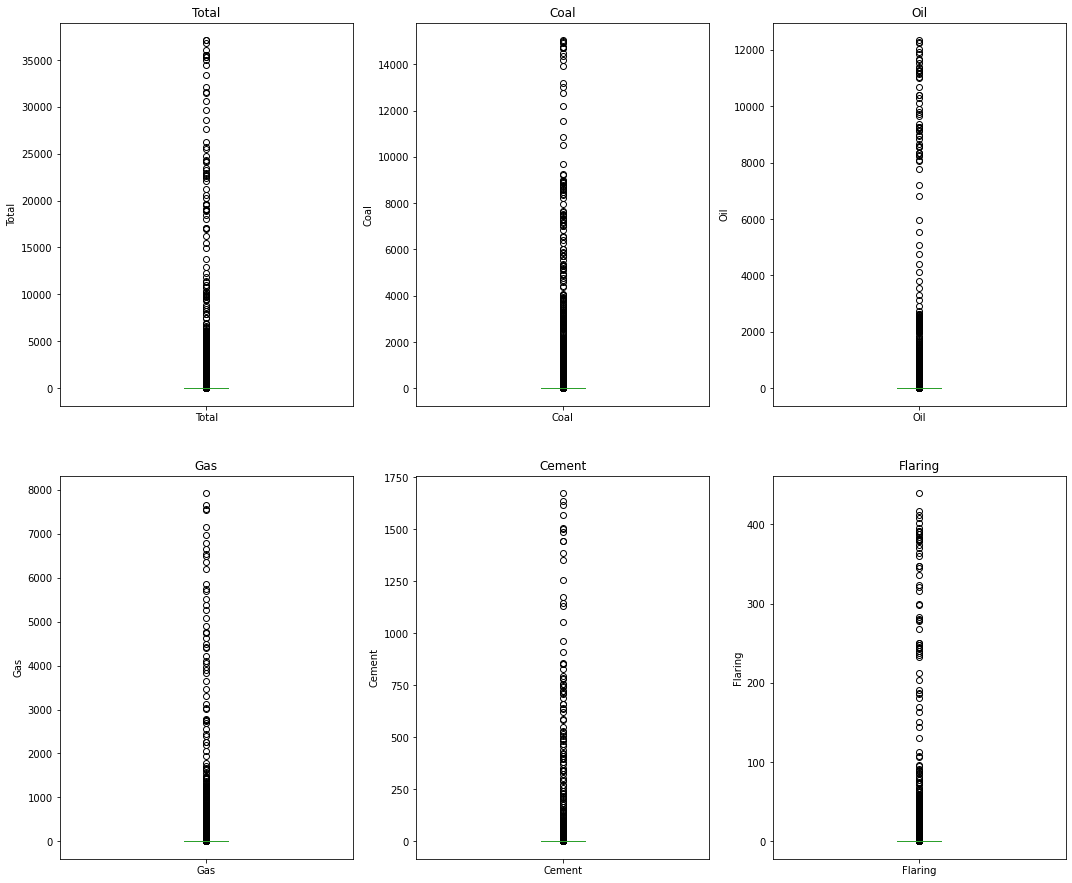

In [ ]:
#Checking for outlier in our numerical columns
def title(x):
  return x.replace('_', ' ')

# Checking for outliers in 

fig,axes = plt.subplots(nrows=2, ncols=3,figsize=(15,8))


#plotting boxplots
for i, ax in enumerate(axes.ravel()):
  df.boxplot(num[i], grid=False, ax=ax)
  ax.set_title(f"{title(num[i])}")
  ax.set_ylabel(num[i])


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

We have outliers but will not drop them since they give a valid observations that are legitimately different from the rest of the data. They are also an important source of information, Removing them from the dataset can lead to loss of information, which is a crucial thing to consider.

In [ ]:
#checking for anomalies 

for col in num:
  print(col)
  print(df3[col].unique())
  
  
  print('\n')

we dont expect negative values inthe above columns


In [ ]:
#saving cleaned data
df3.to_csv('data',index=False)

# **Exploratory Data Analysis**





In [ ]:
#loading our clean data
data = pd.read_csv('/content/data')

In [ ]:
#summary statistics
data.describe()

Year         Total          Coal           Oil          Gas  \
count  1624.000000   1624.000000   1624.000000   1624.000000  1624.000000   
mean   2018.000000    312.163177    174.999036    108.324597    80.805833   
std       2.000616   2494.020931   1235.273941    810.109526   555.543244   
min    2015.000000      0.000000      0.000000      0.007328     0.000000   
25%    2016.000000      0.842364      0.000000      0.975723     0.000000   
50%    2018.000000      8.001081      0.209301      5.435544     0.242208   
75%    2020.000000     50.347494      6.899312     23.552192    17.848851   
max    2021.000000  37123.850352  14979.598083  12345.653374  7921.829472   

            Cement      Flaring   Per Capita  
count  1624.000000  1624.000000  1624.000000  
mean     18.560621     4.363296     4.539822  
std     129.858101    30.574009     5.540679  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.692879  
50%       0.554963     0.000000     2.729693  
75%       2.290108     0.679723     6.022302  
max    1672.592372   439.253991    40.837874

* year run from 2015 to 2021
* 

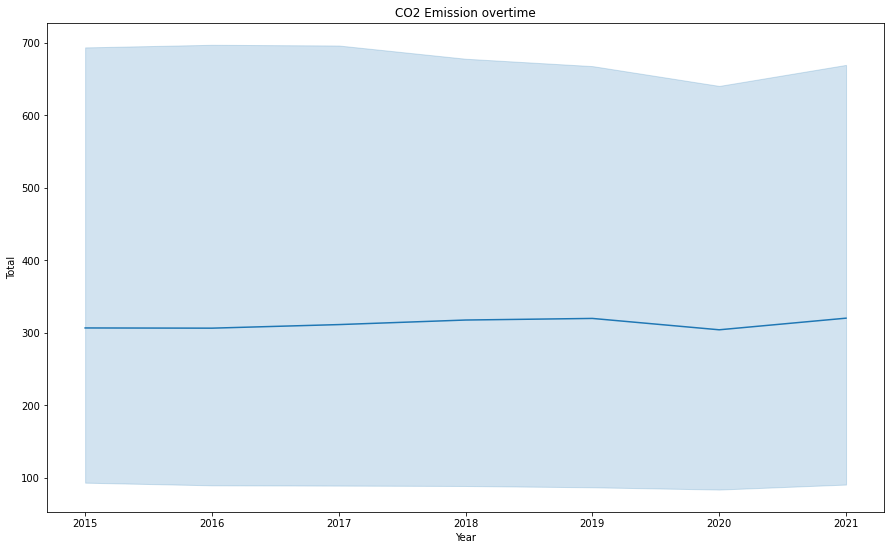

In [ ]:
# Overall Total CO2 Emission trend
plt.figure(figsize = (15,9))
sns.lineplot(data=data, x="Year", y="Total")
plt.title("CO2 Emission overtime")
plt.show()

There has been a steady increase in CO2 Emission overtime overall


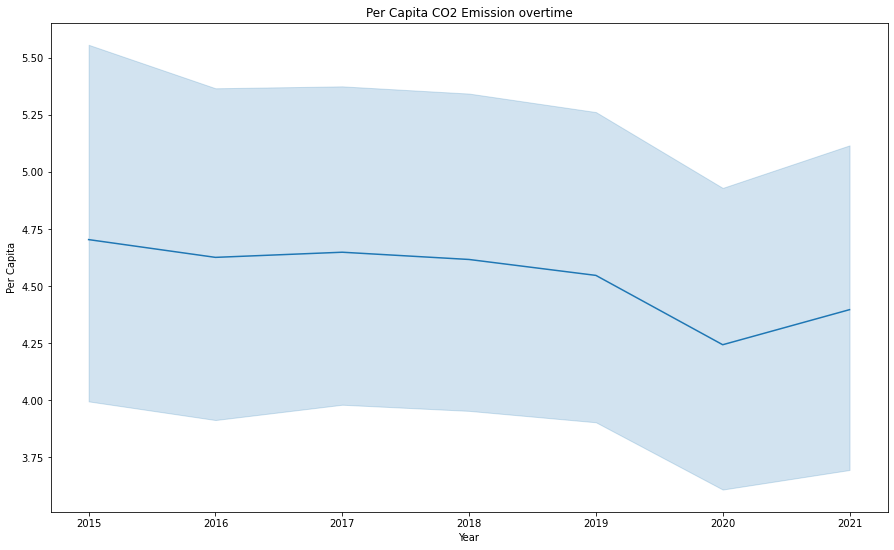

In [ ]:
# Overall per capita CO2 Emission trend
plt.figure(figsize = (15,9))
sns.lineplot(data=data, x="Year", y="Per Capita")
plt.title("Per Capita CO2 Emission overtime")
plt.show()

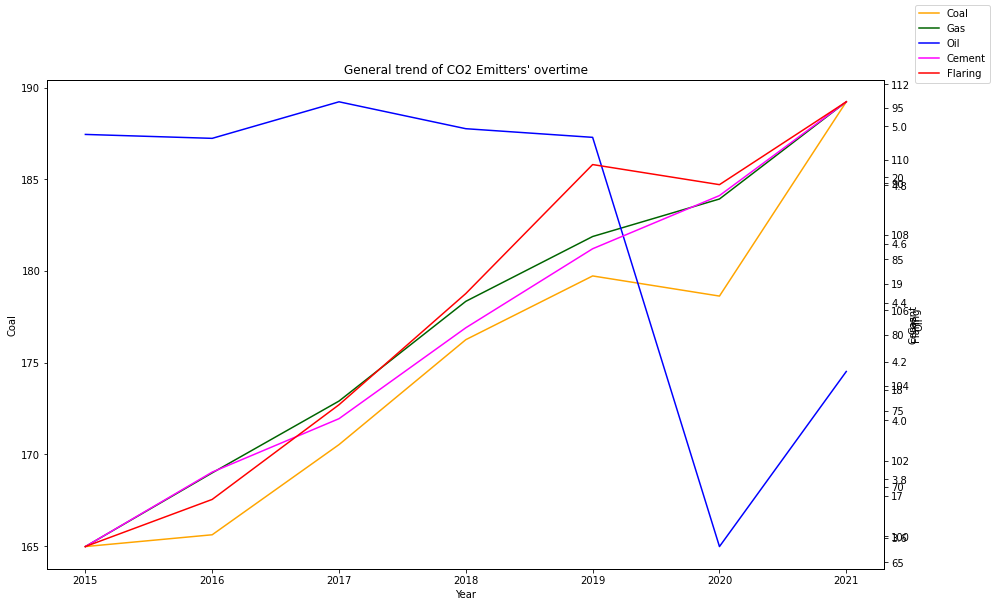

In [ ]:
#examining trends in CO2 Emiiters
plt.figure(figsize=(15,9))

line1 = sns.lineplot(x='Year', y='Coal', data=data, ci= None, color='orange', legend=False, label = 'Coal' )

ax2 = line1.twinx()
line2 = sns.lineplot(x='Year', y='Gas', data=data, ci= None, color='darkgreen',ax=ax2, legend=False, label = 'Gas')

ax3 = line1.twinx()
line3 = sns.lineplot(x='Year', y='Oil', data=data, ci= None, color='Blue',ax=ax3, legend=False, label = 'Oil')

ax4 = line1.twinx()
line4 = sns.lineplot(x='Year', y='Cement', data=data, ci= None, color='Magenta',ax=ax4, legend=False, label = 'Cement')

ax5 = line1.twinx()
line5 = sns.lineplot(x='Year', y='Flaring', data=data, ci= None, color='red',ax=ax5, legend=False, label = 'Flaring')

line1.figure.legend()

plt.title("General trend of CO2 Emitters' overtime")
plt.show()

There has a been steady increase in CO2 emission from Gas, this is due to increase in gas production over time.
Coal had a steady decrease but a sharp increase comenced in 2020 and has been on the increase ever since.
Oil Co2 emission had a prior decrease due to massive campain of reducing pollution but a steady increase happen from 2020 and has been on the rise ever since.


<AxesSubplot:xlabel='Per Capita'>

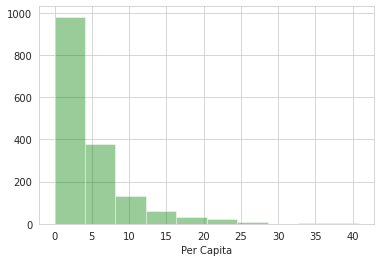

In [ ]:
#per capita distribution
sns.set_style('whitegrid')
sns.distplot(data['Per Capita'], kde = False, color ='green', bins = 10)

Most COuntries lie between 0 and 10 in Per Capita CO2 Emissions with some going above 25

In [ ]:
data12 = data.loc[data['Country'] != 'Global']
data1 = data12.loc[data12['Country'] != 'International Transport']

In [ ]:
data1.head(2)

Country ISO 3166-1 alpha-3  Year     Total      Coal       Oil  \
0  Afghanistan                AFG  2015  9.791093  2.843264  6.624512   
1  Afghanistan                AFG  2016  9.067598  2.878736  5.794097   

        Gas    Cement  Flaring  Per Capita  
0  0.282128  0.041189      0.0    0.290076  
1  0.318639  0.076126      0.0    0.261795

In [ ]:
data1.shape

(1610, 10)

### **Interactive map showing global CO2 Emission levels over time  by country**

In [ ]:
pip install geopandas

In [ ]:
import plotly.express as px
import geopandas as gpd

In [ ]:

# Create a 3D scatter plot
fig = px.scatter_3d(data1, x= "Cement", y="Coal", z="Gas", color="Total", size="Per Capita", size_max=500,
                   hover_name="Country", animation_frame="Year", animation_group="Country",
                   height=600, log_x=True, log_y=True, log_z=True)

# Show the plot
fig.show()

The above 3D map can be used to show trend of Different variables over time

In [ ]:
pip install mapclassify

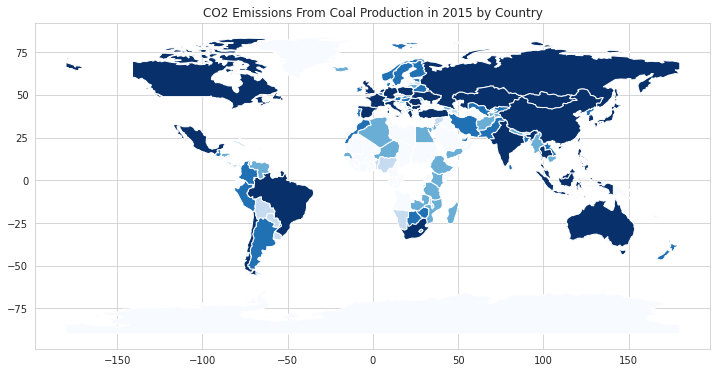

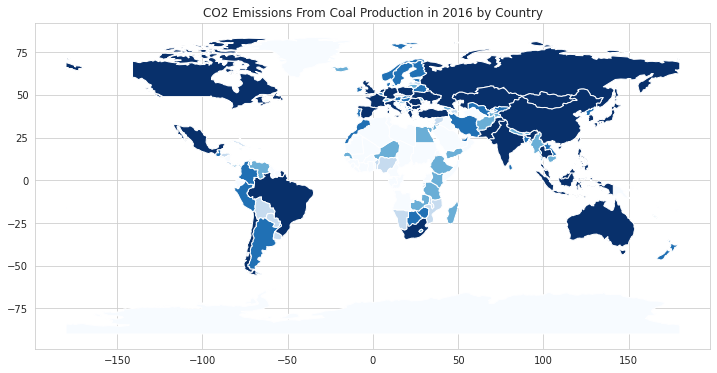

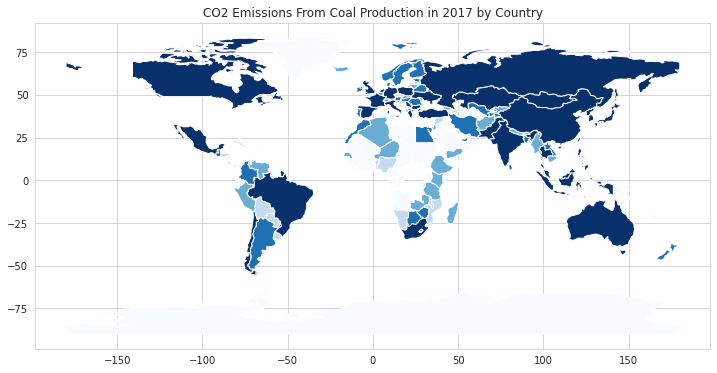

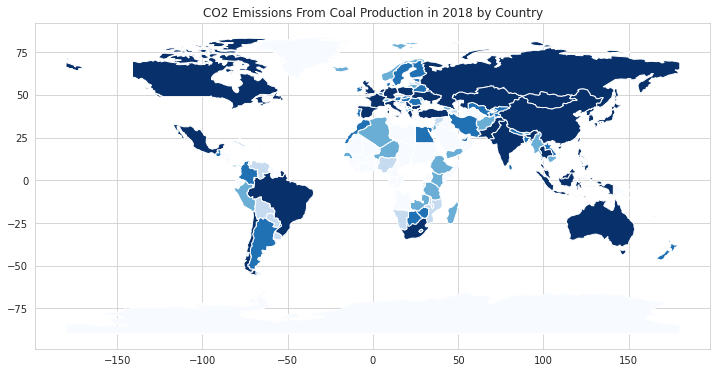

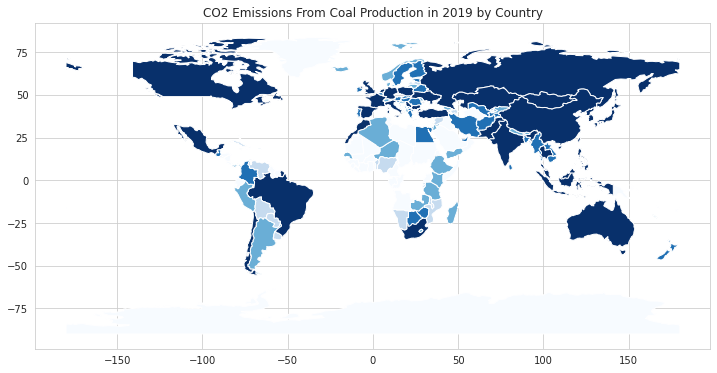

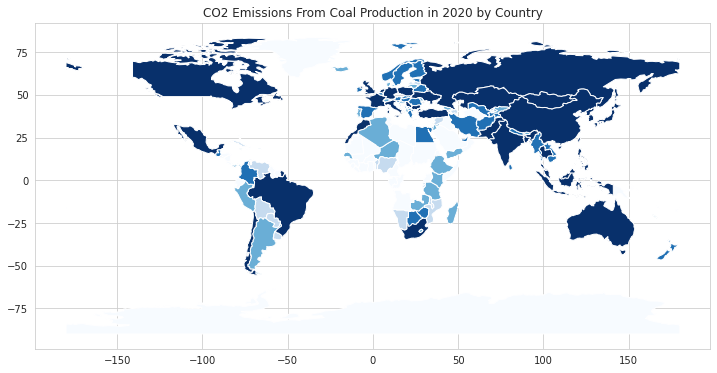

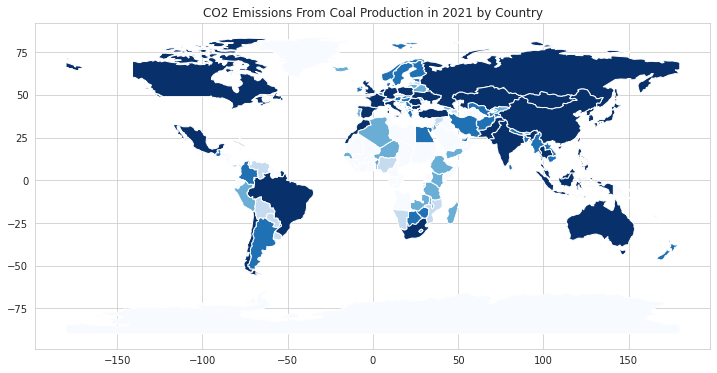

In [ ]:
import mapclassify as mc
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]

for year in years:
    year_data = data1[data1["Year"] == year]
    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    merged_data = world.merge(year_data, left_on="name", right_on="Country")

    merged_data.plot(column="Coal", cmap="Blues", figsize=(15, 6), scheme="quantiles")
    plt.title(f"CO2 Emissions From Coal Production in {year} by Country")
    plt.show()

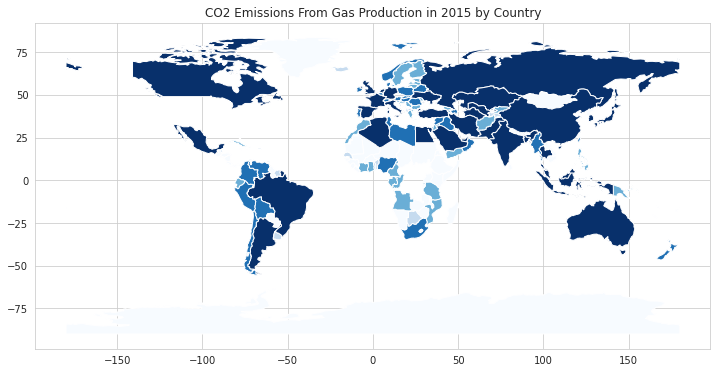

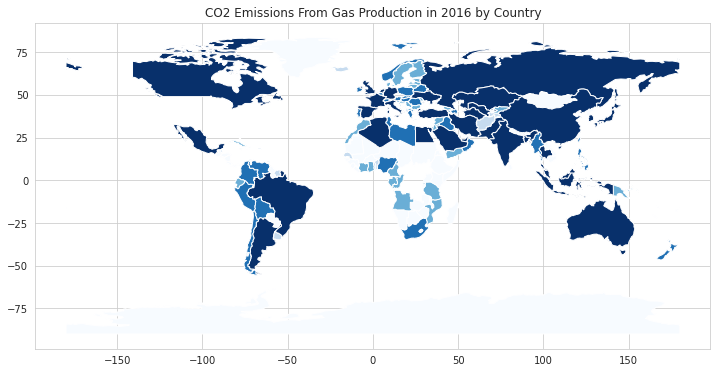

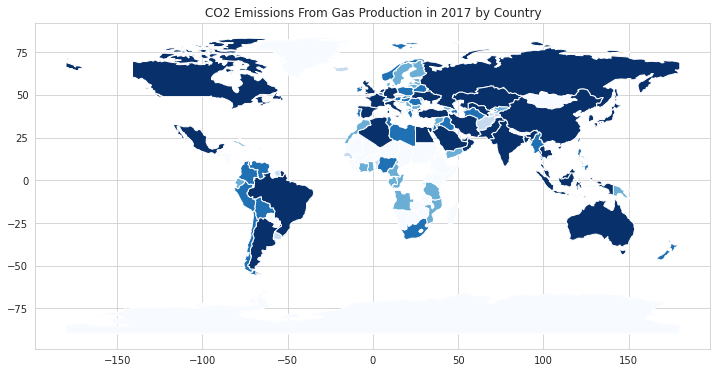

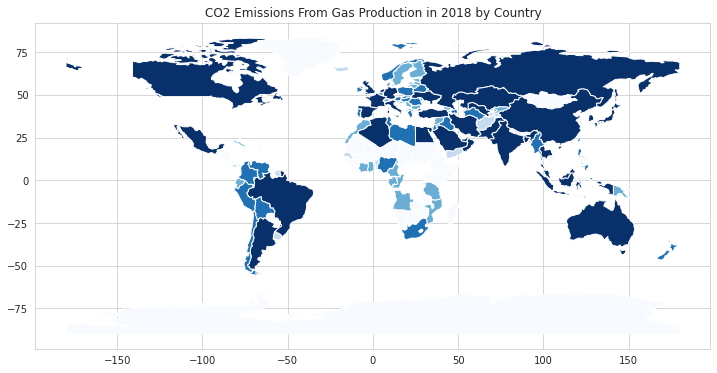

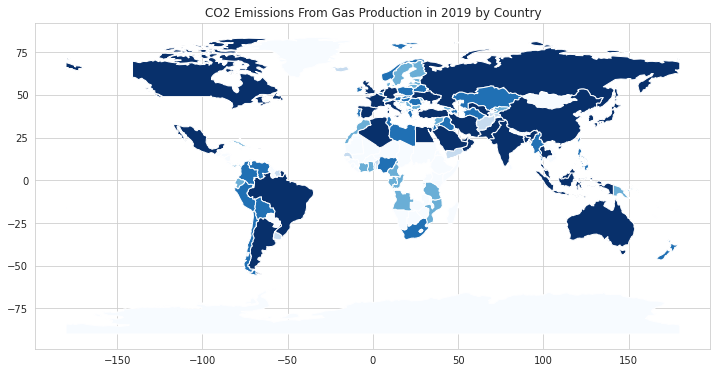

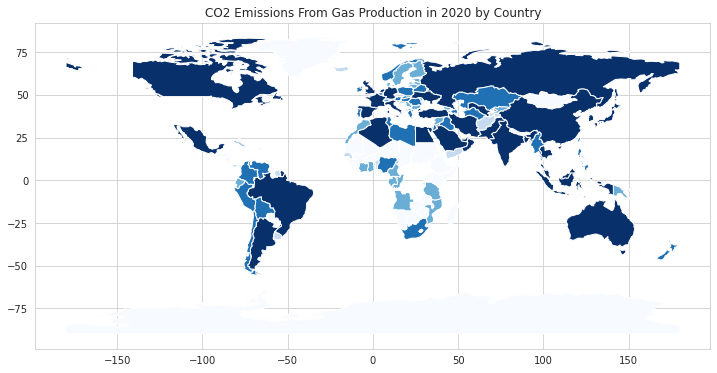

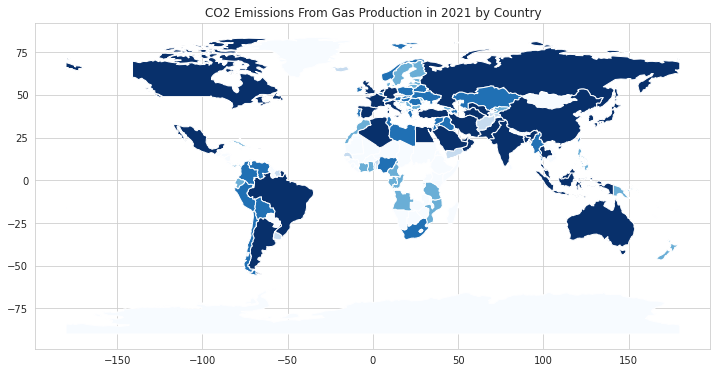

In [ ]:
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]

for year in years:
    year_data = data1[data1["Year"] == year]
    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    merged_data = world.merge(year_data, left_on="name", right_on="Country")

    merged_data.plot(column="Gas", cmap="Blues", figsize=(15, 6), scheme="quantiles")
    plt.title(f"CO2 Emissions From Gas Production in {year} by Country")
    plt.show()

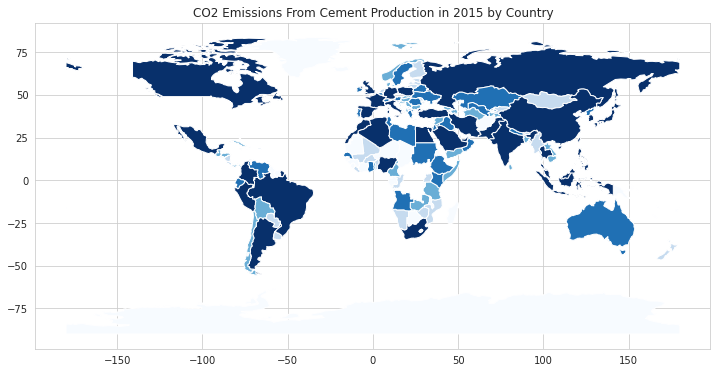

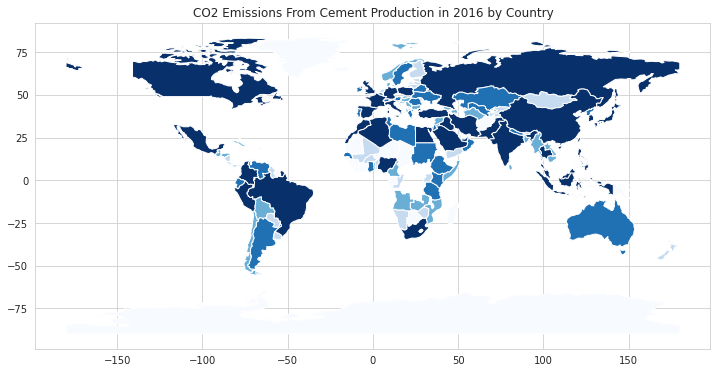

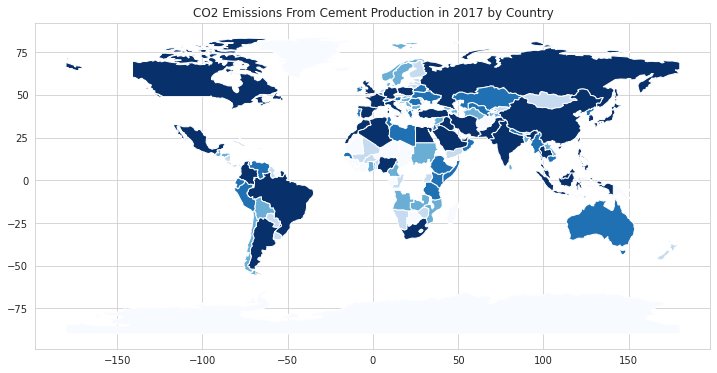

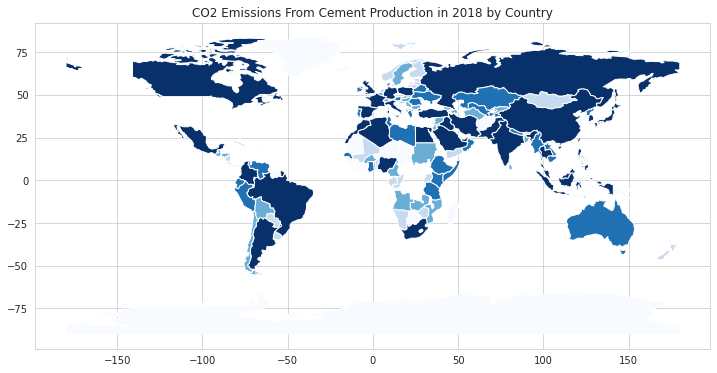

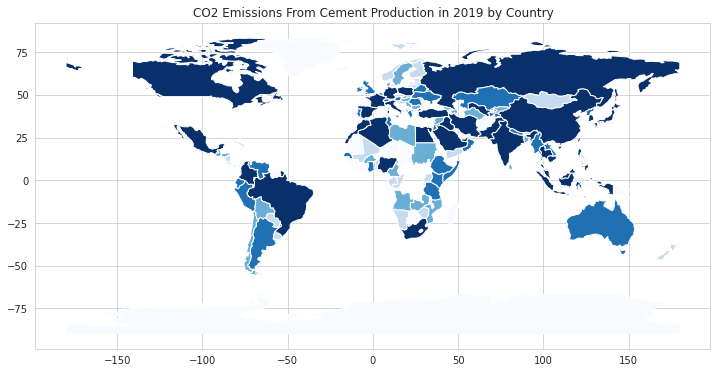

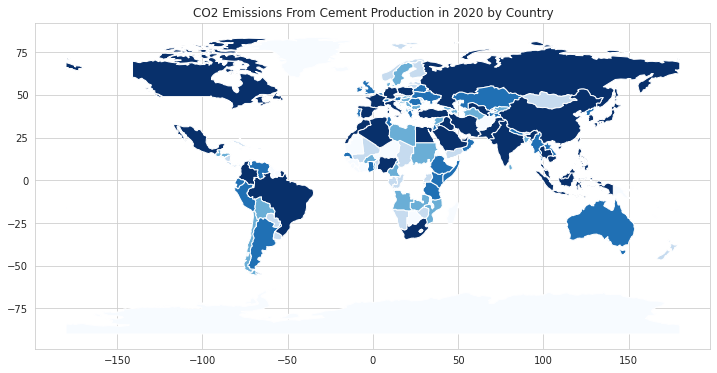

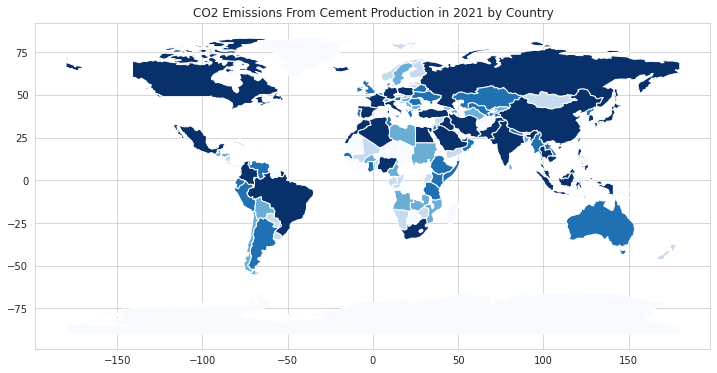

In [ ]:
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]

for year in years:
    year_data = data1[data1["Year"] == year]
    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    merged_data = world.merge(year_data, left_on="name", right_on="Country")

    merged_data.plot(column="Cement", cmap="Blues", figsize=(15, 6), scheme="quantiles")
    plt.title(f"CO2 Emissions From Cement Production in {year} by Country")
    plt.show()

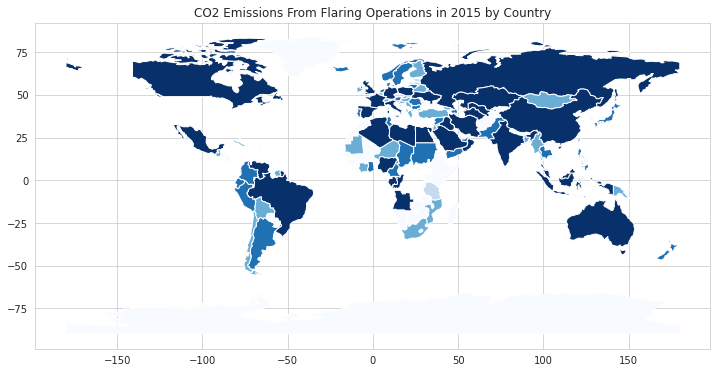

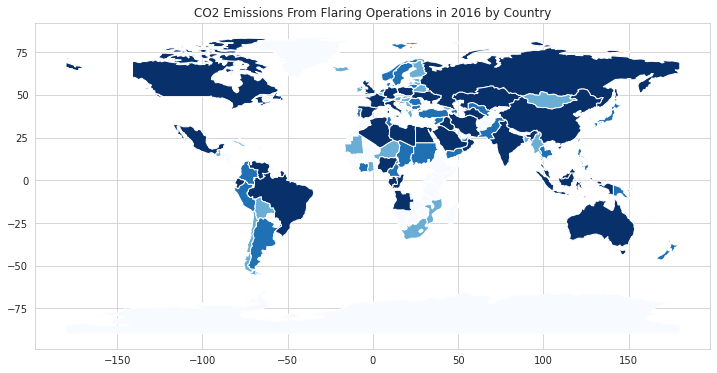

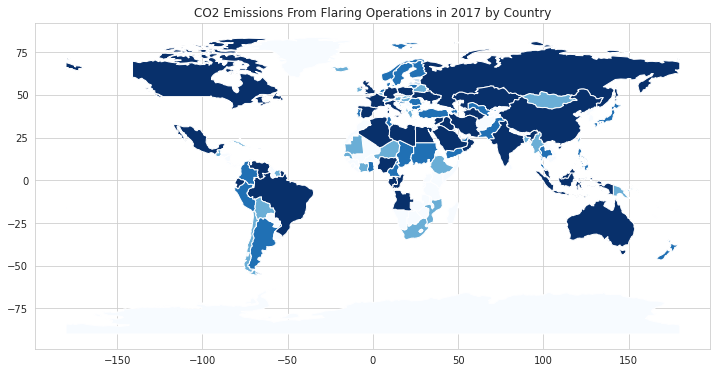

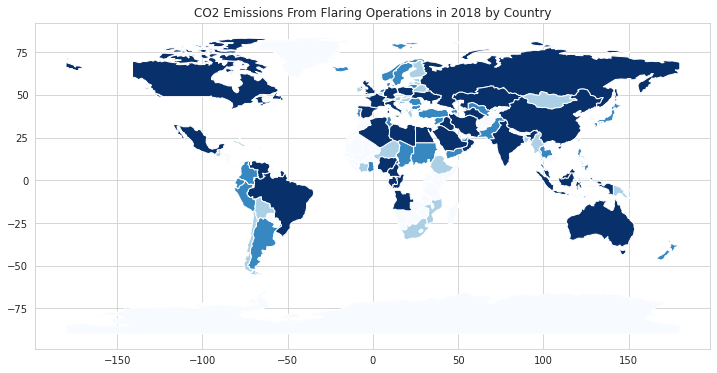

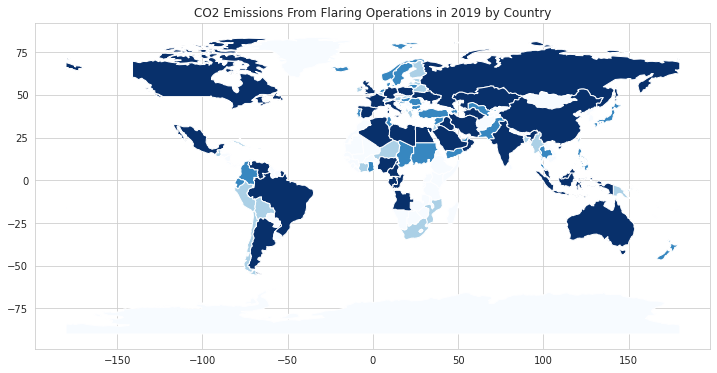

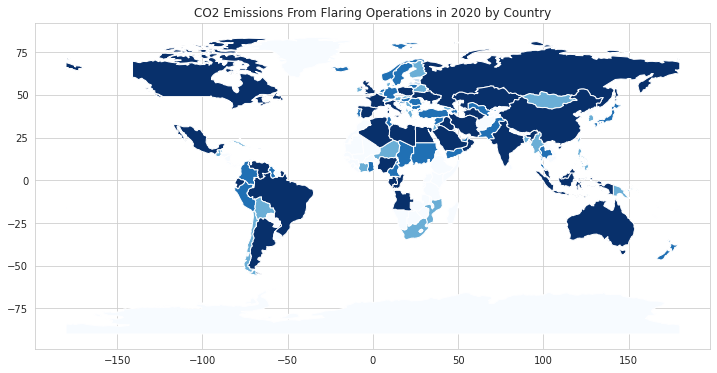

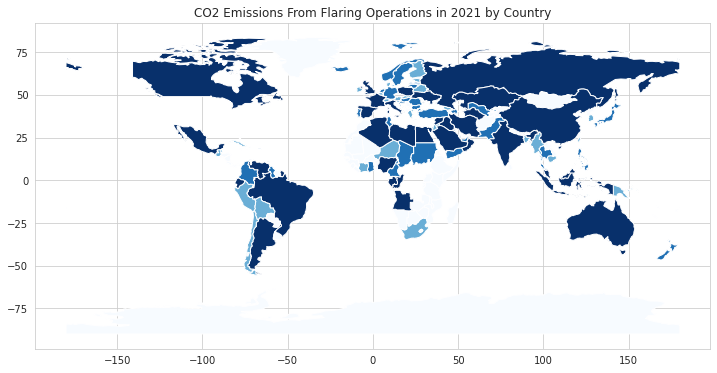

In [ ]:
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]

for year in years:
    year_data = data1[data1["Year"] == year]
    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    merged_data = world.merge(year_data, left_on="name", right_on="Country")

    merged_data.plot(column="Flaring", cmap="Blues", figsize=(15, 6), scheme="quantiles")
    plt.title(f"CO2 Emissions From Flaring Operations in {year} by Country")
    plt.show()

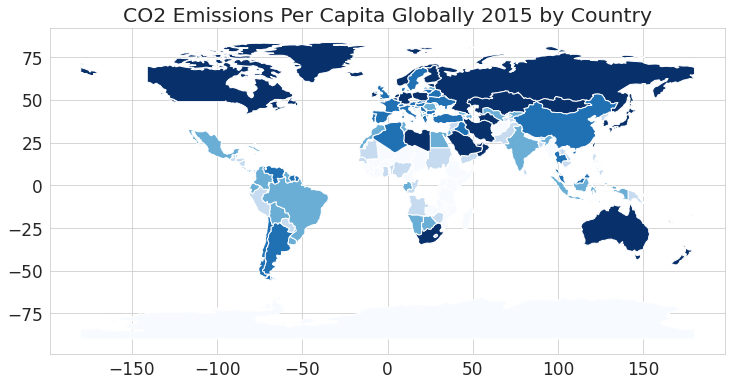

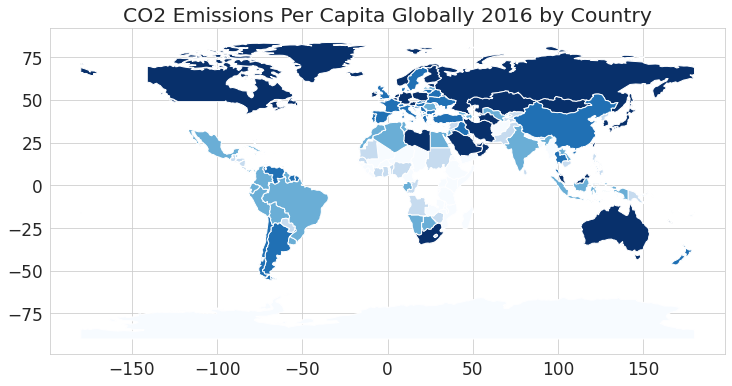

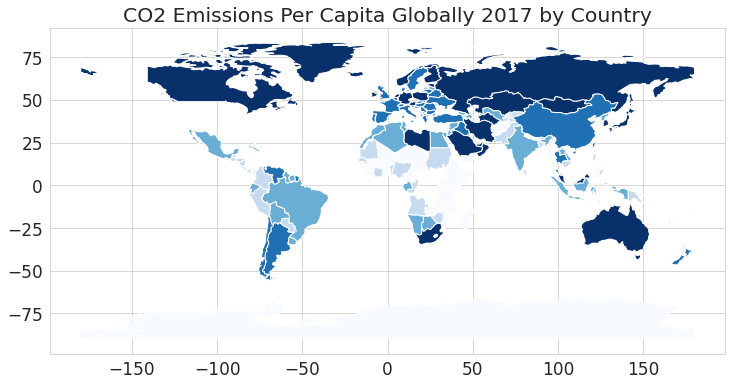

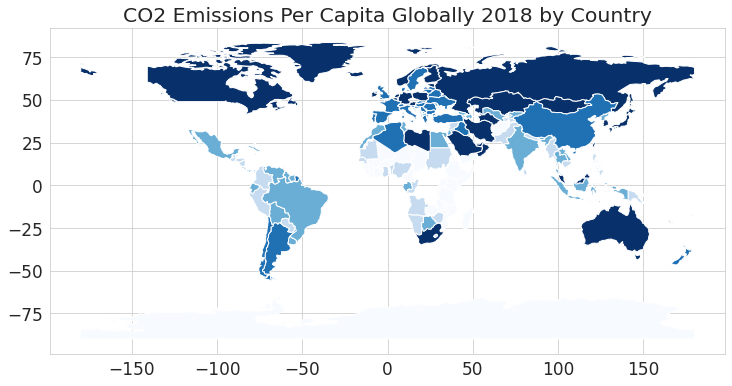

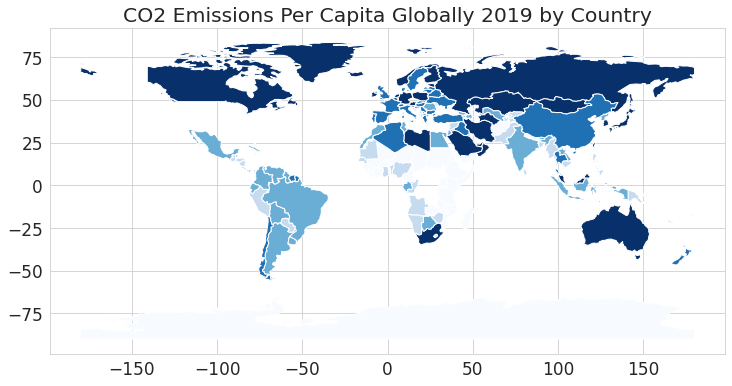

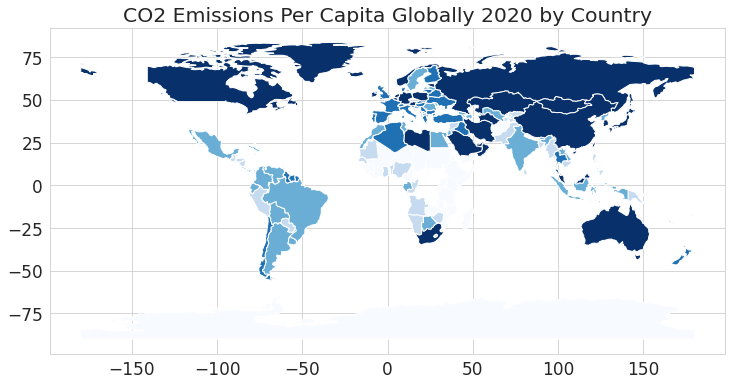

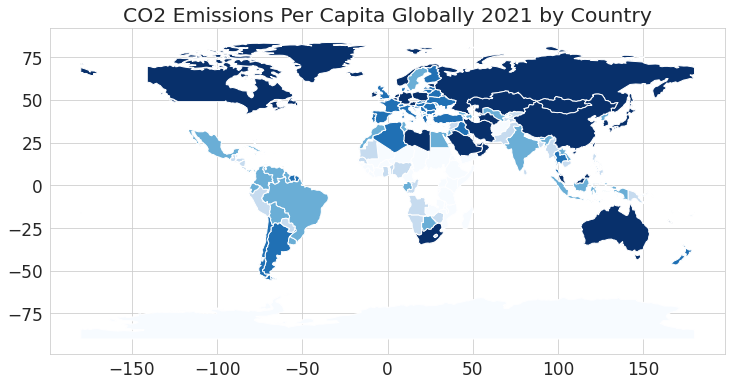

In [ ]:
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]

for year in years:
    year_data = data1[data1["Year"] == year]
    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    merged_data = world.merge(year_data, left_on="name", right_on="Country")

    merged_data.plot(column="Per Capita", cmap="Blues", figsize=(15, 6), scheme="quantiles")
    plt.title(f"CO2 Emissions Per Capita Globally {year} by Country")
    plt.show()

**1. Countries vs their total CO2 Emission**

**a. Highest CO2 Emitters  Overall**

<AxesSubplot:title={'center':'Coutries with highest Co2 in total emissions over the time'}>

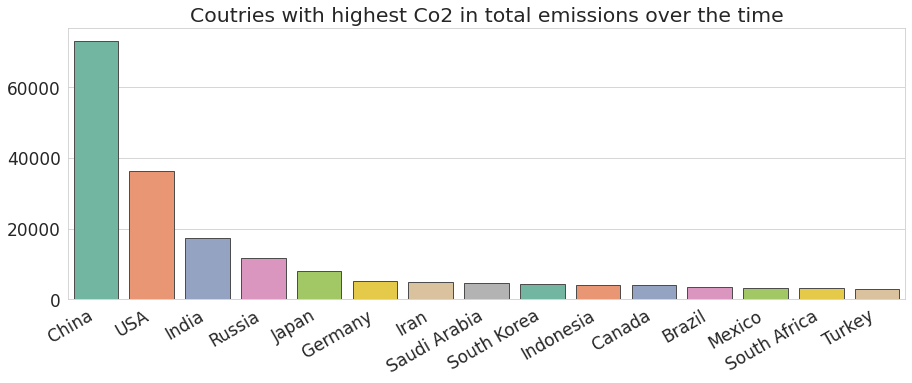

In [ ]:

countries = list(data1.groupby('Country').sum().sort_values(by='Total',ascending = False).index)
values = list(data1.groupby('Country').sum().sort_values(by='Total', ascending = False)['Total'])




## plot Bargraph
plt.figure(figsize = (15,5))
plt.rcParams['font.size'] = 17.0
plt.xticks(rotation = 30, ha = 'right')
plt.title("Coutries with highest Co2 in total emissions over the time")
# sns.set_style('darkgrid')
sns.barplot(x=countries[:15], y=values[:15], palette ='Set2', edgecolor ='.3')

In [ ]:
#Visual by percentage
dft=data1.groupby(['Country'])['Total'].mean().sort_values(ascending=False)[0:10].reset_index()
fig3= px.pie(dft,values='Total',names='Country',title= "Top 10 Countries by Total co2 Emission")
fig3.show()

China produces the highest co2. This is true since alot of manufacturing companies are based there. We also have USA, India, Russia in the top list.

**b. Countries with least CO2 Emission**





<AxesSubplot:title={'center':'Coutries with Least Co2 in total emissions over the time'}>

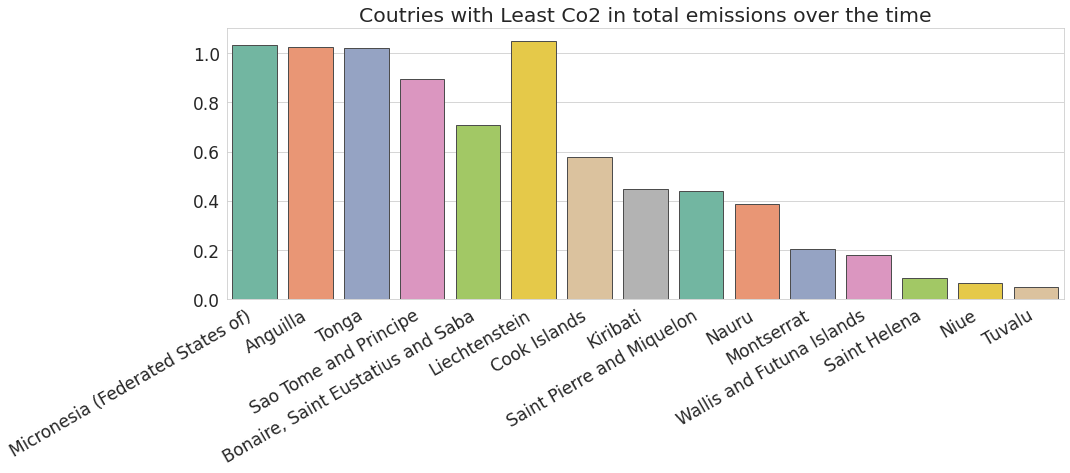

In [ ]:
## plot Bargraph
plt.figure(figsize = (15,5))
plt.rcParams['font.size'] = 17.0
plt.xticks(rotation = 30, ha = 'right')
plt.title("Coutries with Least Co2 in total emissions over the time")
# sns.set_style('darkgrid')
sns.barplot(x=countries[-15:], y=values[-15:], palette ='Set2', edgecolor ='.3')

**2. Countries with highest CO2 Emission from Oil production**

<AxesSubplot:title={'center':'Coutries with highest co2 Emission from Oil production'}>

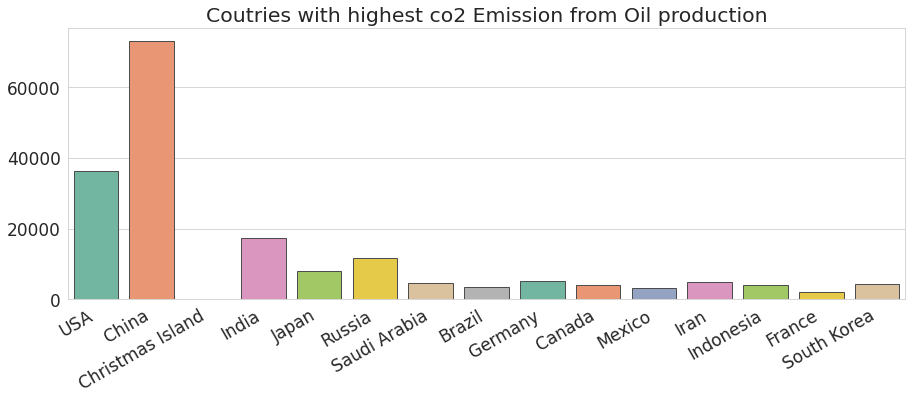

In [ ]:
countries = list(data1.groupby('Country').sum().sort_values(by='Oil',ascending = False).index)
values = list(data1.groupby('Country').sum().sort_values(by='Oil', ascending = False)['Total'])




## plot Bargraph
plt.figure(figsize = (15,5))
plt.rcParams['font.size'] = 17.0
plt.xticks(rotation = 30, ha = 'right')
plt.title("Coutries with highest co2 Emission from Oil production")
# sns.set_style('darkgrid')
sns.barplot(x=countries[:15], y=values[:15], palette ='Set2', edgecolor ='.3')

In [ ]:
#Visual by percentage
dfo=data1.groupby(['Country'])['Oil'].mean().sort_values(ascending=False)[0:10].reset_index()
fig3= px.pie(dfo,values='Oil',names='Country',title= " Top 10 Countries by Total co2 Emission from Oil Production")
fig3.show()

**Countries with Least CO2 Emission from Oil production**

<AxesSubplot:title={'center':'Coutries with least co2 Emission from Oil production'}>

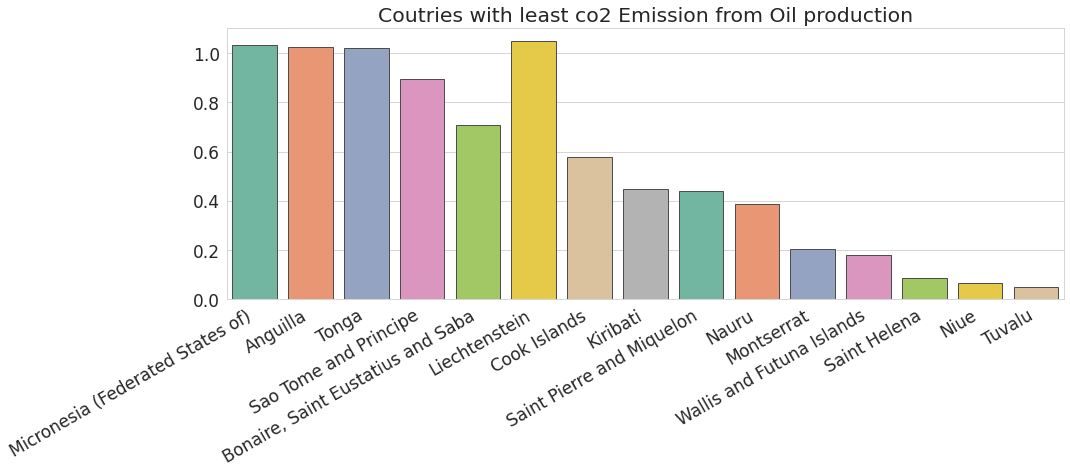

In [ ]:
countries = list(data1.groupby('Country').sum().sort_values(by='Oil',ascending = False).index)
values = list(data1.groupby('Country').sum().sort_values(by='Oil', ascending = False)['Total'])




## plot Bargraph
plt.figure(figsize = (15,5))
plt.rcParams['font.size'] = 17.0
plt.xticks(rotation = 30, ha = 'right')
plt.title("Coutries with least co2 Emission from Oil production")
# sns.set_style('darkgrid')
sns.barplot(x=countries[-15:], y=values[-15:], palette ='Set2', edgecolor ='.3')

In [ ]:
#Visual by percentage
dfo=data1.groupby(['Country'])['Oil'].mean().sort_values(ascending=False)[-10:].reset_index()
fig3= px.pie(dfo,values='Oil',names='Country',title= " Bottom  10 Countries by Total co2 Emission from Oil Production")
fig3.show()

**3. Countries with highest CO2 Emission from Coal Production**

<AxesSubplot:title={'center':'Coutries with highest co2 Emission from Coal production'}>

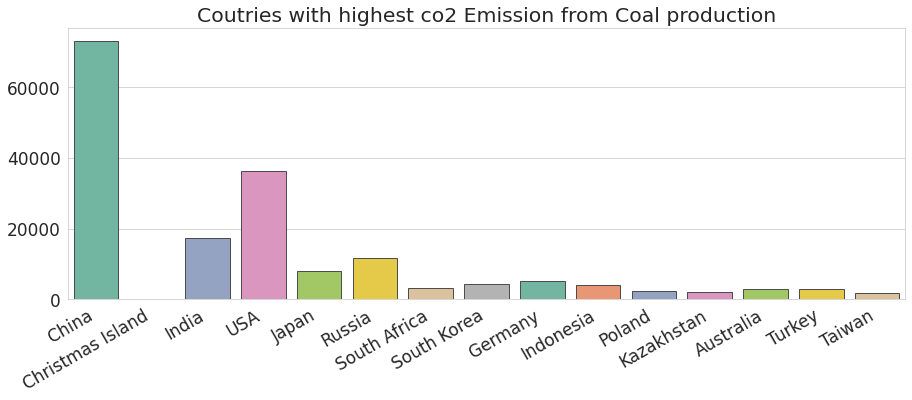

In [ ]:
countries = list(data1.groupby('Country').sum().sort_values(by='Coal',ascending = False).index)
values = list(data1.groupby('Country').sum().sort_values(by='Coal', ascending = False)['Total'])




## plot Bargraph
plt.figure(figsize = (15,5))
plt.rcParams['font.size'] = 17.0
plt.xticks(rotation = 30, ha = 'right')
plt.title("Coutries with highest co2 Emission from Coal production")
# sns.set_style('darkgrid')
sns.barplot(x=countries[:15], y=values[:15], palette ='Set2', edgecolor ='.3')

In [ ]:
#Visual by percentage
dfc=data1.groupby(['Country'])['Coal'].mean().sort_values(ascending=False)[0:10].reset_index()
fig3= px.pie(dfc,values='Coal',names='Country',title= " Top 10 Countries by Total co2 Emission from Coal Production")
fig3.show()

**Countries with least CO2 Emission from Coal Production**

<AxesSubplot:title={'center':'Coutries with least co2 Emission from Coal production'}>

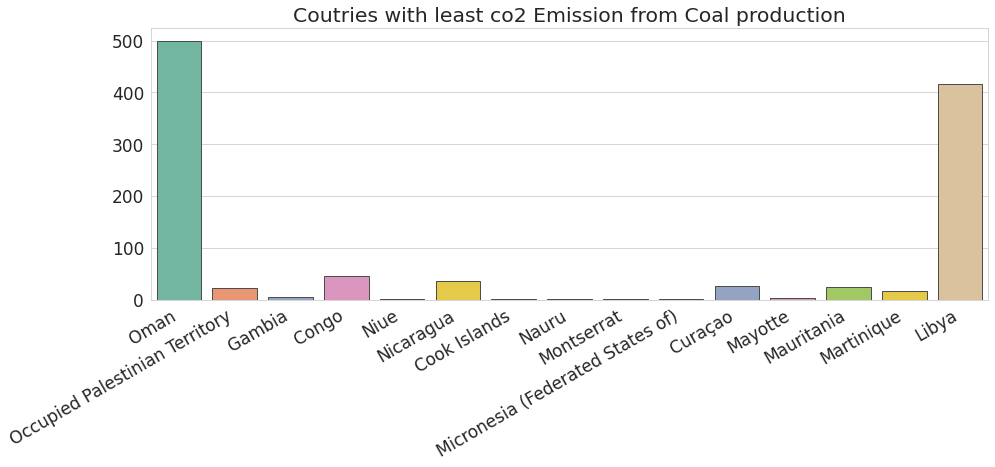

In [ ]:
countries = list(data1.groupby('Country').sum().sort_values(by='Coal',ascending = False).index)
values = list(data1.groupby('Country').sum().sort_values(by='Coal', ascending = False)['Total'])




## plot Bargraph
plt.figure(figsize = (15,5))
plt.rcParams['font.size'] = 17.0
plt.xticks(rotation = 30, ha = 'right')
plt.title("Coutries with least co2 Emission from Coal production")
# sns.set_style('darkgrid')
sns.barplot(x=countries[-15:], y=values[-15:], palette ='Set2', edgecolor ='.3')

**4. Countries with highest CO2 Emission for Gas production**

<AxesSubplot:title={'center':'Coutries with highest co2 Emission from Gas production'}>

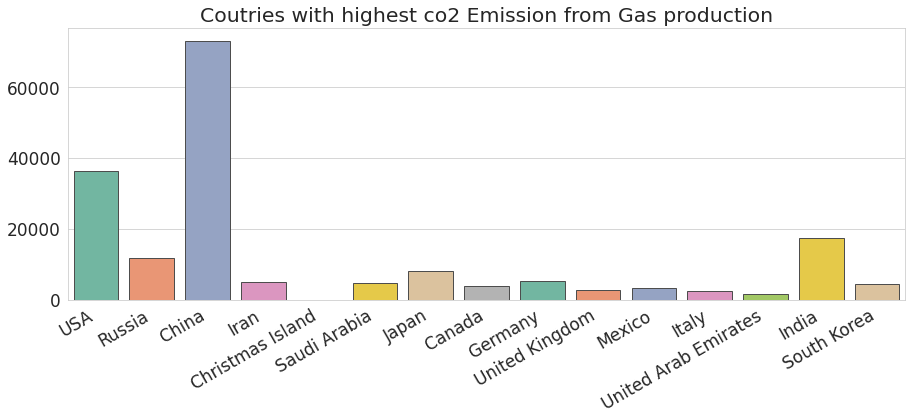

In [ ]:
countries = list(data1.groupby('Country').sum().sort_values(by='Gas',ascending = False).index)
values = list(data1.groupby('Country').sum().sort_values(by='Gas', ascending = False)['Total'])




## plot Bargraph
plt.figure(figsize = (15,5))
plt.rcParams['font.size'] = 17.0
plt.xticks(rotation = 30, ha = 'right')
plt.title("Coutries with highest co2 Emission from Gas production")
# sns.set_style('darkgrid')
sns.barplot(x=countries[:15], y=values[:15], palette ='Set2', edgecolor ='.3')

In [ ]:
#Visual by percentage
dfg=data1.groupby(['Country'])['Gas'].mean().sort_values(ascending=False)[0:10].reset_index()
fig3= px.pie(dfg,values='Gas',names='Country',title= " Top 10 Countries by Total co2 Emission from Gas Production")
fig3.show()

**Countries with least CO2 Emission from Gas Production**

<AxesSubplot:title={'center':'Coutries with least co2 emission from Gas production'}>

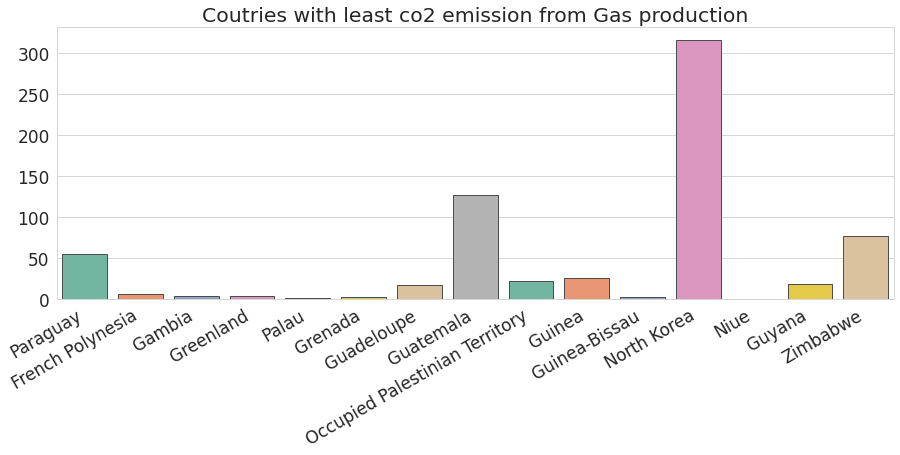

In [ ]:
countries = list(data1.groupby('Country').sum().sort_values(by='Gas',ascending = False).index)
values = list(data1.groupby('Country').sum().sort_values(by='Gas', ascending = False)['Total'])




## plot Bargraph
plt.figure(figsize = (15,5))
plt.rcParams['font.size'] = 17.0
plt.xticks(rotation = 30, ha = 'right')
plt.title("Coutries with least co2 emission from Gas production")
# sns.set_style('darkgrid')
sns.barplot(x=countries[-15:], y=values[-15:], palette ='Set2', edgecolor ='.3')

**5. Countries with Highest CO2 Emission from Cement Production**

<AxesSubplot:title={'center':'Coutries with highest co2 emission from cement production'}>

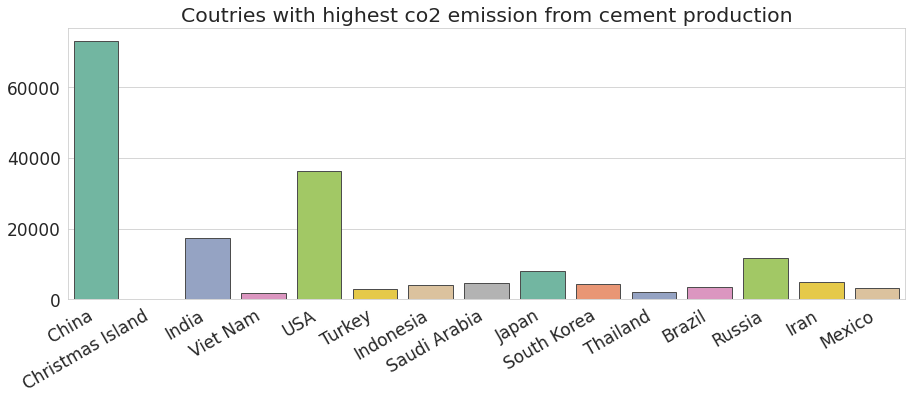

In [ ]:
countries = list(data1.groupby('Country').sum().sort_values(by='Cement',ascending = False).index)
values = list(data1.groupby('Country').sum().sort_values(by='Cement', ascending = False)['Total'])




## plot Bargraph
plt.figure(figsize = (15,5))
plt.rcParams['font.size'] = 17.0
plt.xticks(rotation = 30, ha = 'right')
plt.title("Coutries with highest co2 emission from cement production")
# sns.set_style('darkgrid')
sns.barplot(x=countries[:15], y=values[:15], palette ='Set2', edgecolor ='.3')

In [ ]:
#Visual by percentage
dfcm=data1.groupby(['Country'])['Cement'].mean().sort_values(ascending=False)[0:10].reset_index()
fig3= px.pie(dfcm,values='Cement',names='Country',title= " Top 10 Countries by Total co2 Emission from Cement Production")
fig3.show()

**Countries with Highest CO2 Emission from Cement Production**

<AxesSubplot:title={'center':'Coutries with least co2 Emission from Cement production'}>

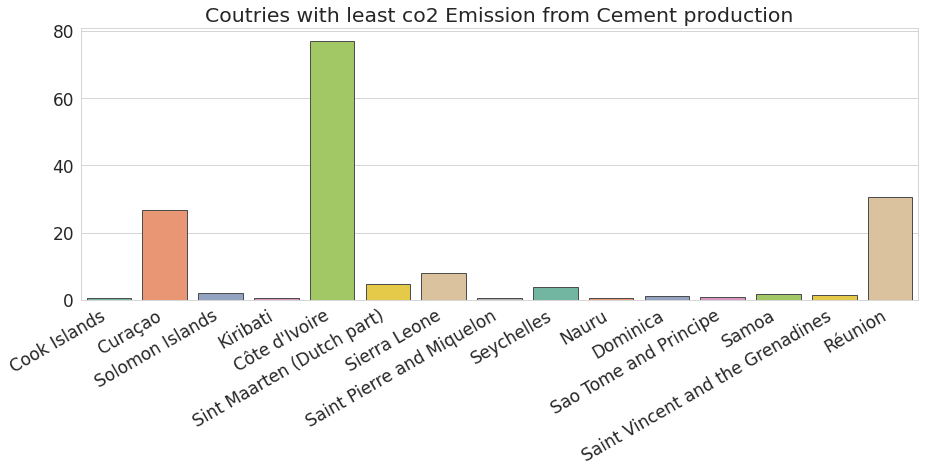

In [ ]:
countries = list(data1.groupby('Country').sum().sort_values(by='Cement',ascending = False).index)
values = list(data1.groupby('Country').sum().sort_values(by='Cement', ascending = False)['Total'])




## plot Bargraph
plt.figure(figsize = (15,5))
plt.rcParams['font.size'] = 17.0
plt.xticks(rotation = 30, ha = 'right')
plt.title("Coutries with least co2 Emission from Cement production")
# sns.set_style('darkgrid')
sns.barplot(x=countries[-15:], y=values[-15:], palette ='Set2', edgecolor ='.3')

**6. Countries with Highest CO2 Emission from Flaring Operations**

<AxesSubplot:title={'center':'Coutries with highest co2 emission from flaring operations'}>

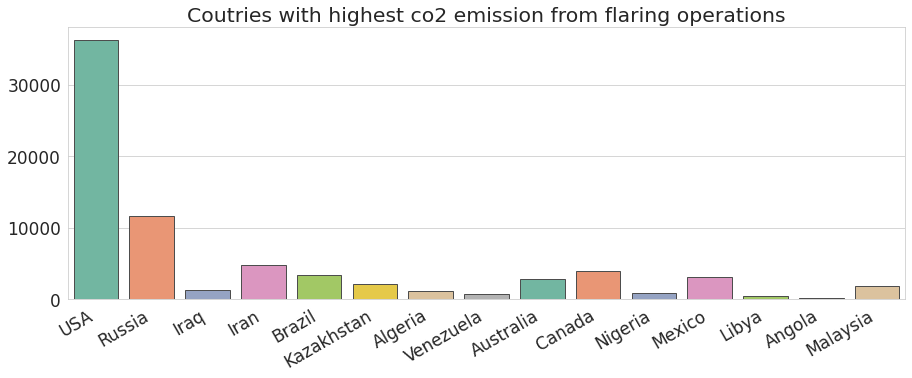

In [ ]:
countries = list(data1.groupby('Country').sum().sort_values(by='Flaring',ascending = False).index)
values = list(data1.groupby('Country').sum().sort_values(by='Flaring', ascending = False)['Total'])




## plot Bargraph
plt.figure(figsize = (15,5))
plt.rcParams['font.size'] = 17.0
plt.xticks(rotation = 30, ha = 'right')
plt.title("Coutries with highest co2 emission from flaring operations")
# sns.set_style('darkgrid')
sns.barplot(x=countries[:15], y=values[:15], palette ='Set2', edgecolor ='.3')

In [ ]:
#Visual by percentage
dff=data1.groupby(['Country'])['Flaring'].mean().sort_values(ascending=False)[0:10].reset_index()
fig3= px.pie(dff,values='Flaring',names='Country',title= " Top 10 Countries by Total co2 Emission from Flaring Operations")
fig3.show()

**Countries with Least CO2 Emission from Flaring Operations**

<AxesSubplot:title={'center':'Coutries least co2 emission from flaring operations'}>

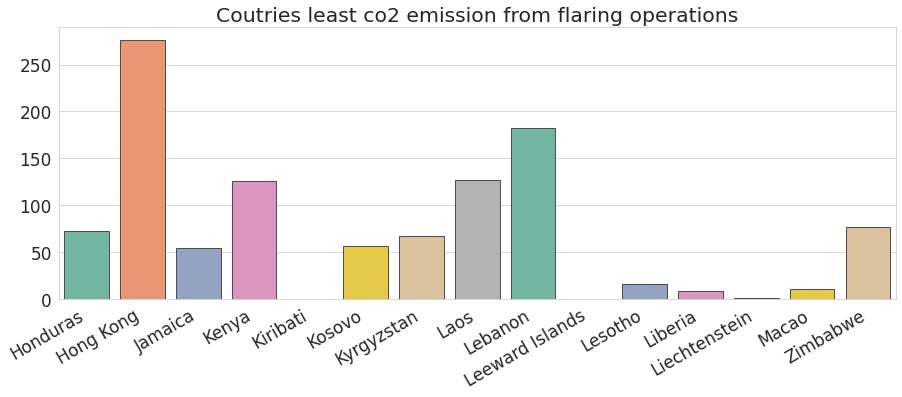

In [ ]:
countries = list(data1.groupby('Country').sum().sort_values(by='Flaring',ascending = False).index)
values = list(data1.groupby('Country').sum().sort_values(by='Flaring', ascending = False)['Total'])




## plot Bargraph
plt.figure(figsize = (15,5))
plt.rcParams['font.size'] = 17.0
plt.xticks(rotation = 30, ha = 'right')
plt.title("Coutries least co2 emission from flaring operations")
# sns.set_style('darkgrid')
sns.barplot(x=countries[-15:], y=values[-15:], palette ='Set2', edgecolor ='.3')

# **Zooming in on Kenya**

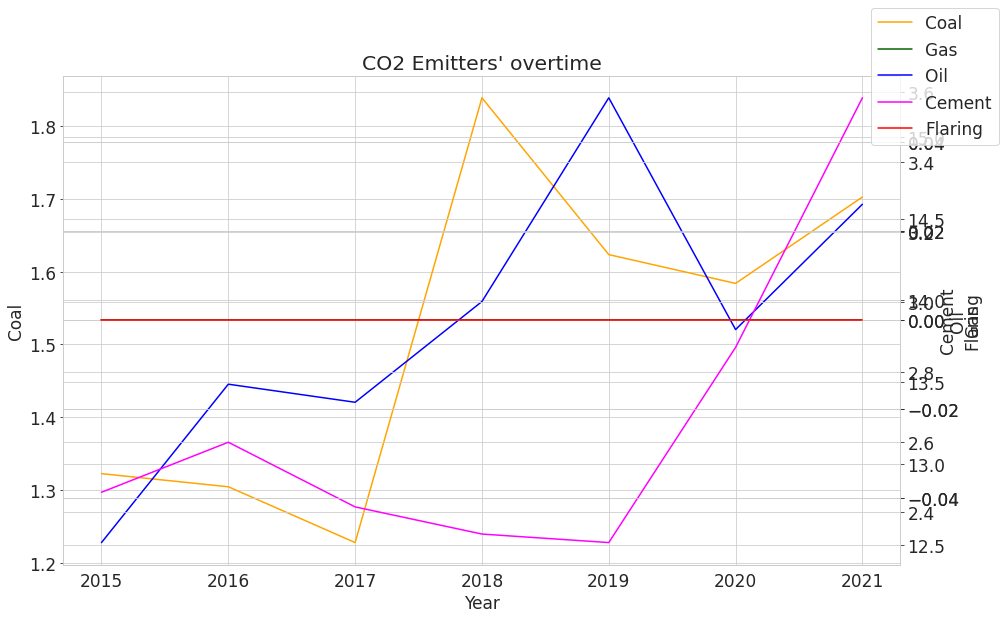

In [ ]:
#examining trend in kenya
dfk = data1[data1['Country'] == "Kenya"]

plt.figure(figsize=(15,9))

line1 = sns.lineplot(x='Year', y='Coal', data=dfk, ci= None, color='orange', legend=False, label = 'Coal' )

ax2 = line1.twinx()
line2 = sns.lineplot(x='Year', y='Gas', data=dfk, ci= None, color='darkgreen',ax=ax2, legend=False, label = 'Gas')

ax3 = line1.twinx()
line3 = sns.lineplot(x='Year', y='Oil', data=dfk, ci= None, color='Blue',ax=ax3, legend=False, label = 'Oil')

ax4 = line1.twinx()
line4 = sns.lineplot(x='Year', y='Cement', data=dfk, ci= None, color='Magenta',ax=ax4, legend=False, label = 'Cement')

ax5 = line1.twinx()
line5 = sns.lineplot(x='Year', y='Flaring', data=dfk, ci= None, color='red',ax=ax5, legend=False, label = 'Flaring')

line1.figure.legend()

plt.title("CO2 Emitters' overtime")
plt.show()

Kenya has a lot pf cement processing plant hence the steady increase in CO2 Emission from cement production.

The country is also a big exporter of crude oil, where it does the processing on it's own hence the steady increase in CO2 Emission from Oil production. 

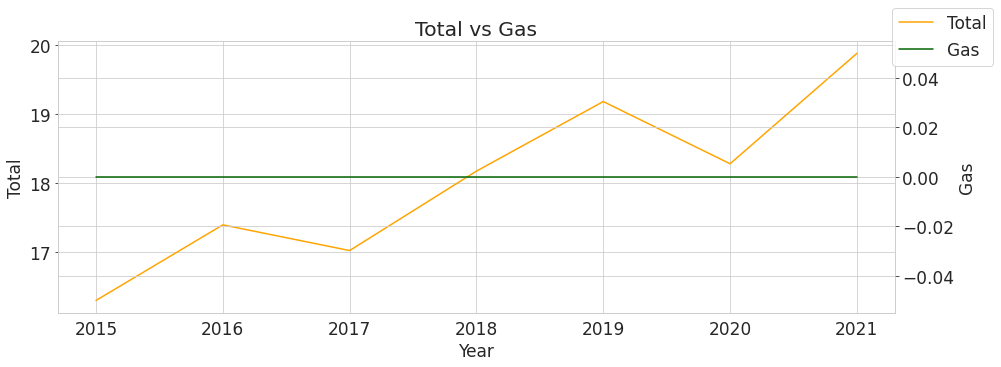

In [ ]:
plt.figure(figsize=(15,5))

line1 = sns.lineplot(x='Year', y='Total', data=dfk, ci= None, color='orange', legend=False, label = 'Total' )

ax2 = line1.twinx()
line2 = sns.lineplot(x='Year', y='Gas', data=dfk, ci= None, color='darkgreen',ax=ax2, legend=False, label = 'Gas')


line1.figure.legend()

plt.title("Total vs Gas")
plt.show()

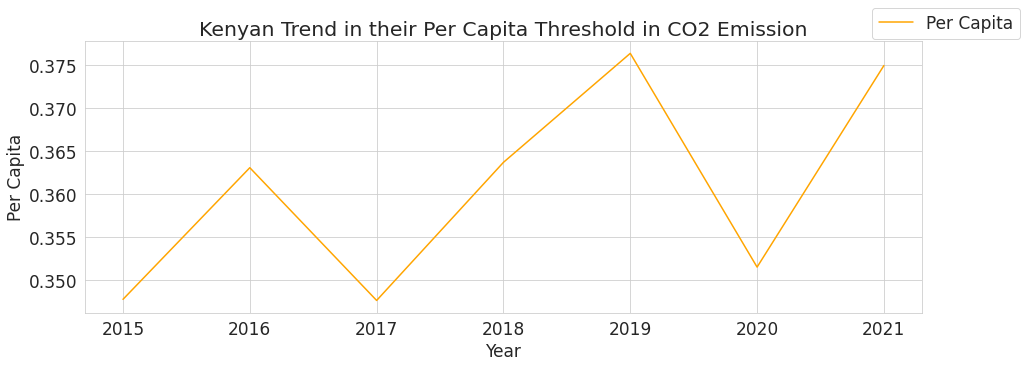

In [ ]:
plt.figure(figsize=(15,5))

line1 = sns.lineplot(x='Year', y='Per Capita', data=dfk, ci= None, color='orange', legend=False, label = 'Per Capita' )

line1.figure.legend()

plt.title("Kenyan Trend in their Per Capita Threshold in CO2 Emission")
plt.show()

Overall Kenya has a increase in the total amount of CO2 Emission meaning it hasn't really picked up on Bio measure to cab this crisis to help in climate change.

It's also a big producer of gas however most of the gas produced use decarbonization pathways

The Per capita thershold varies overtime but it has sharp increase after covid Pandemic after call for using Local manufacturer instead of imports.

# **USA**

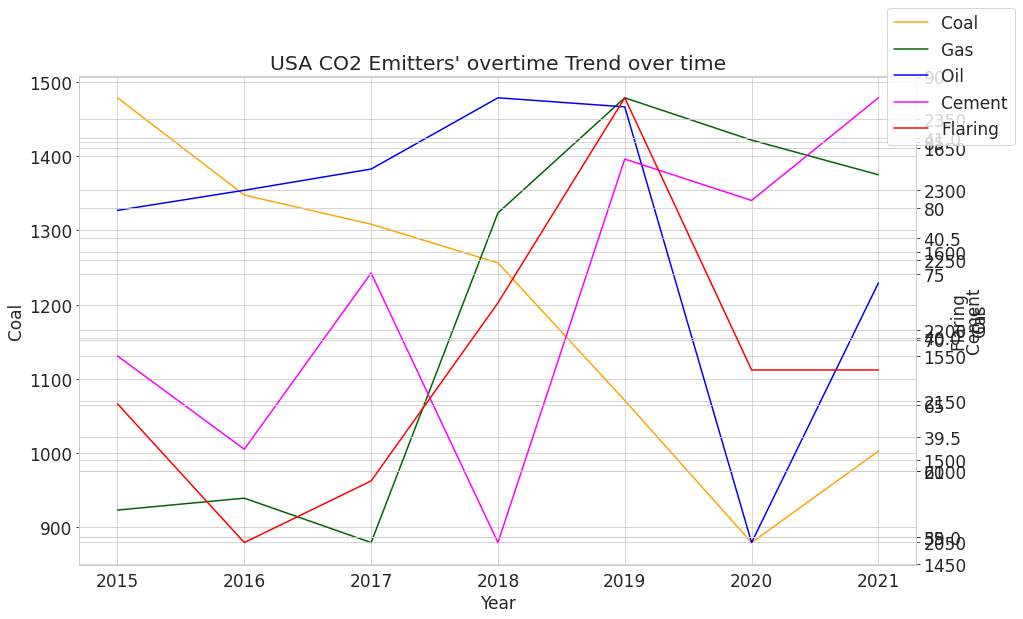

In [ ]:
#examining trend in USA
dfk = data1[data1['Country'] == "USA"]

plt.figure(figsize=(15,9))

line1 = sns.lineplot(x='Year', y='Coal', data=dfk, ci= None, color='orange', legend=False, label = 'Coal' )

ax2 = line1.twinx()
line2 = sns.lineplot(x='Year', y='Gas', data=dfk, ci= None, color='darkgreen',ax=ax2, legend=False, label = 'Gas')

ax3 = line1.twinx()
line3 = sns.lineplot(x='Year', y='Oil', data=dfk, ci= None, color='Blue',ax=ax3, legend=False, label = 'Oil')

ax4 = line1.twinx()
line4 = sns.lineplot(x='Year', y='Cement', data=dfk, ci= None, color='Magenta',ax=ax4, legend=False, label = 'Cement')

ax5 = line1.twinx()
line5 = sns.lineplot(x='Year', y='Flaring', data=dfk, ci= None, color='red',ax=ax5, legend=False, label = 'Flaring')

line1.figure.legend()

plt.title("USA CO2 Emitters' overtime Trend over time")
plt.show()

# **China**

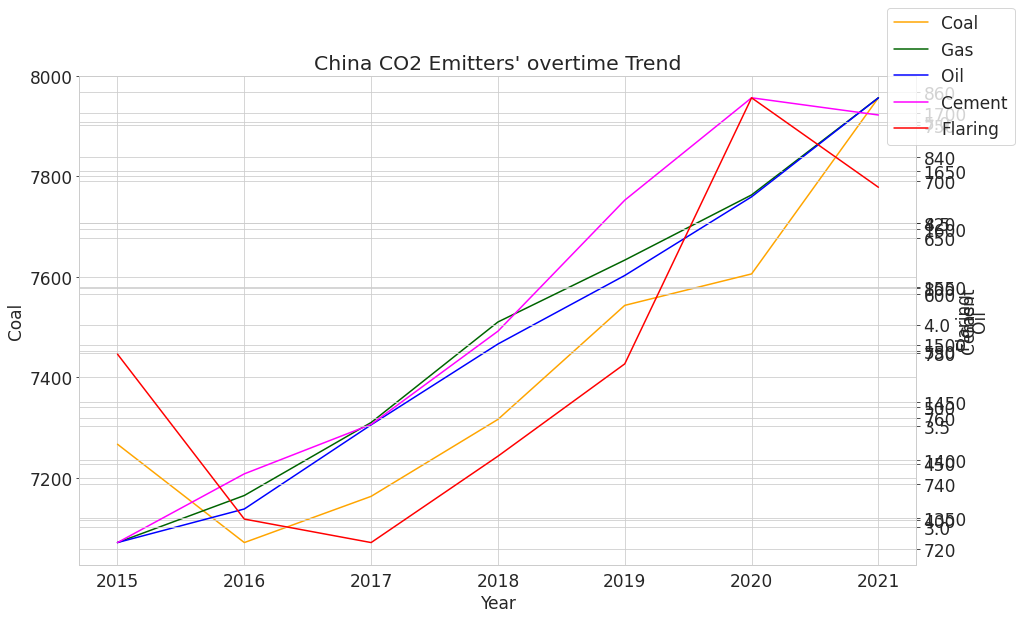

In [ ]:
#examining trend in China
dfk = data1[data1['Country'] == "China"]

plt.figure(figsize=(15,9))

line1 = sns.lineplot(x='Year', y='Coal', data=dfk, ci= None, color='orange', legend=False, label = 'Coal' )

ax2 = line1.twinx()
line2 = sns.lineplot(x='Year', y='Gas', data=dfk, ci= None, color='darkgreen',ax=ax2, legend=False, label = 'Gas')

ax3 = line1.twinx()
line3 = sns.lineplot(x='Year', y='Oil', data=dfk, ci= None, color='Blue',ax=ax3, legend=False, label = 'Oil')

ax4 = line1.twinx()
line4 = sns.lineplot(x='Year', y='Cement', data=dfk, ci= None, color='Magenta',ax=ax4, legend=False, label = 'Cement')

ax5 = line1.twinx()
line5 = sns.lineplot(x='Year', y='Flaring', data=dfk, ci= None, color='red',ax=ax5, legend=False, label = 'Flaring')

line1.figure.legend()

plt.title("China CO2 Emitters' overtime Trend")
plt.show()

In [ ]:
df3.head()

Country ISO 3166-1 alpha-3  Year      Total      Coal       Oil  \
265  Afghanistan                AFG  2015   9.791093  2.843264  6.624512   
266  Afghanistan                AFG  2016   9.067598  2.878736  5.794097   
267  Afghanistan                AFG  2017   9.867969  3.447824  6.074912   
268  Afghanistan                AFG  2018  10.818048  3.847200  6.620848   
269  Afghanistan                AFG  2019  11.081621  3.954767  6.842956   

          Gas    Cement  Flaring  Per Capita  
265  0.282128  0.041189      0.0    0.290076  
266  0.318639  0.076126      0.0    0.261795  
267  0.300448  0.044785      0.0    0.276852  
268  0.293120  0.056880      0.0    0.294876  
269  0.245569  0.038329      0.0    0.293401

# **Checking for correlation**

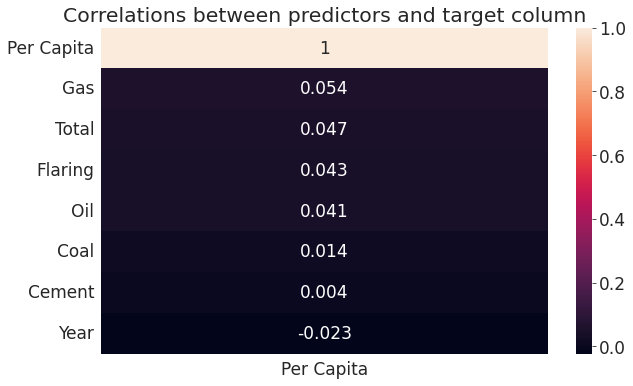

In [ ]:
#highlighting correlations specifically with target
corr = df3.corr()
target_col=corr[['Per Capita']].sort_values(by='Per Capita', ascending=False)

plt.figure(figsize=(10,6))

sns.heatmap(target_col,annot=True)
plt.title("Correlations between predictors and target column")
plt.show()

Gas Production is the highest producers of CO2, Followed by OIl, Flaring operations, Coal and Cement has the least.

<AxesSubplot:>

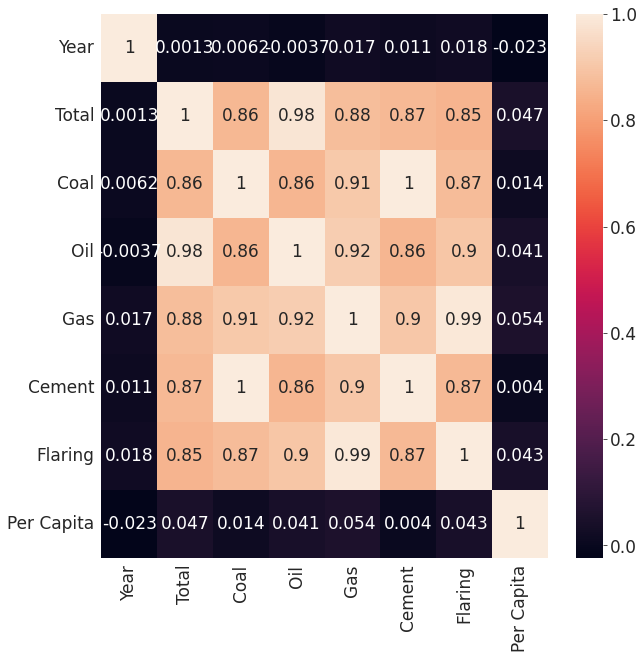

In [ ]:
#let's plot a heatmap and see how all element correlate

correlations = df3.corr()
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(correlations, annot = True)

From the above heatmap most of there fossil fuels correlated with each other highly. 
We see for example gas correlate very highly with all this is because for all the fossils fuel production there is Gas production which why generaly the we have Gas as the highest CO2 Emitter.

# **Modelling**

In [ ]:
# from sklearn.model_selection import KFold
import scipy as sp
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [ ]:

#dropping unnecessary columns

df3.drop(columns=['Year', 'Country', 'ISO 3166-1 alpha-3'], inplace=True, axis=1)

#printing variables that will be used in modelling
print(df3.columns)

In [ ]:
#separating features and target for use in modelling

X = df3.drop(['Per Capita'], axis=1)

y = df3['Per Capita']

In [ ]:

# Splitting dataset to train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [ ]:

#list with feature names
x_cols = X.columns
x_cols

Index(['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring'], dtype='object')

In [ ]:
#scaled features
#transforming test based on values obtained from train (scaler should only be 
# fitted on train set then used to transform both train and test to prevent 
# data leakage caused by fitting on entire dataset)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:

#highlighting the mean and range in the target column
print("mean: ", y.mean())
print("range: ", (y.max() - y.min()))

mean:  4.53982192518473
range:  40.837874


In [ ]:
#list that will track rmses
rmses = []

# **Linear regression**
Baseline model

In [ ]:

#using scaled features 

#fitting linear model
regression = LinearRegression()
regression.fit(X_train_sc,y_train)

#predicting on unseen data
y_pred = regression.predict(X_test_sc)

#evaluating model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

rmses.append((f'Baseline linear model RMSE: {rmse}'))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
     

Mean Squared Error: 21.15521025490038
Root Mean Squared Error: 4.599479346067376


In [ ]:
rmses

['Baseline linear model RMSE: 4.599479346067376']

**Checking for homoscedasticity**

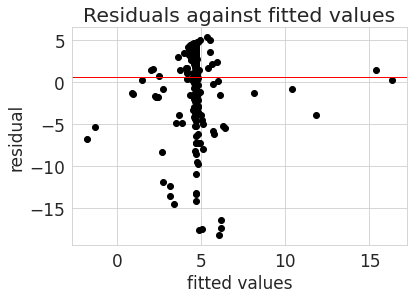

In [ ]:

# Creating the residuals by substracting the test value from the predicted 
# value for each row in the test dataset

residuals = np.subtract(y_pred, y_test)


#plotting residuals
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.title('Residuals against fitted values')
plt.show()
     

In [ ]:
#assessing heteroscedasticity using Barlett's test

test_result, p_value = sp.stats.bartlett(y_pred, residuals)


# If the pvalue is less than the significance level of 0.05, then the null
# hypothesis is rejected - the variance is different for at least one pair of datapoints

# Otherwise the null hypothesis that 
# the variance is homogeneous across the data

#using significance level of 0.05:
if (p_value < 0.05 ):
  print('the variances are not homogenous')
else:
  print('the variances are homogeneous across the data')

the variances are not homogenous


**Checking if residuals are normally distributed**

In [ ]:

# importing the shapiro function
from scipy.stats import shapiro 


# testing for normality. extracting statistic and p value
stat, p = shapiro(residuals)


# interpreting
alpha = 0.05
if p > alpha:
	print('Sample appears to have a normal distribution')
else:
	print('Sample does not appear to have a normal distribution')

Sample does not appear to have a normal distribution


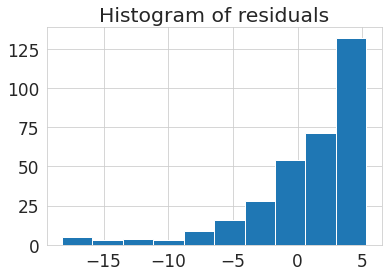


Skew of residuals: -1.8363019646022682


In [ ]:

#plotting histogram of residuals
plt.hist(residuals, bins= 10)
plt.title("Histogram of residuals")
plt.show()

print(f'\nSkew of residuals: {residuals.skew()}')

 **Multicollinearity check**

In [ ]:
#checking for multicollinearity 
#creating function that will calculate the VIF for each feature
def vif(df, features):
  vif, tolerance = {}, {}
  for feature in features:
    #extract other features other than the one chosen as y into a list
    X = [f for f in features if f!=feature]
    X, y = df[X], df[feature]
    #extract r2
    r2 = LinearRegression().fit(X, y).score(X, y)
    #calculate tolerance
    tolerance[feature] = 1-r2
    #calculate VIF
    vif[feature] = 1/tolerance[feature]
  return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [ ]:

#checking multicollinearity
vif(df3, df3.drop('Per Capita', axis=1).columns)

VIF  Tolerance
Total     39.588667   0.025260
Coal     162.275721   0.006162
Oil       52.205373   0.019155
Gas       91.006497   0.010988
Cement   155.093544   0.006448
Flaring   56.685969   0.017641

# **Lasso regression**
Introduces penalty (on sum of absolute values of the coefficients) that shrinks coefficients and introduces more bias in the model in order to reduce the variance of the model (helps in addressing the issue of overfitting).

It can be used in feature selection because it can shrink the value of a coefficient to zero, but a drawback in cases of multicollinearity is that since it randomly selects which variable to prioritise, it may drop a column considered more useful for interpretation .

In [ ]:

#finding best hyperparameter (penalty) value for lasso
parameters = {'alpha': np.concatenate(([0.001,0.01], np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 20, 1)))}
lasso = Lasso()
#finding alpha value
search = GridSearchCV(estimator=lasso,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_train_sc,y_train)
print(search.best_params_)

{'alpha': 0.01}


In [ ]:
#using scaled features 

#fitting lasso model 
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_sc,y_train)

#predicting on unseen data
y_pred = lasso.predict(X_test_sc)

#evaluating model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

rmses.append([f'Tuned lasso model RMSE: {rmse}'])


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 21.163872361391068
Root Mean Squared Error: 4.600420889591633


In [ ]:
for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 4.599479346067376

['Tuned lasso model RMSE: 4.600420889591633']


# **Ridge Regression**
Introduces penalty (on sum of squares of the coefficients) that shrinks coefficients and introduces more bias in the model in order to reduce the variance of the model (helps in addressing the issue of overfitting).

Unlike Lasso, it cant shrink the value of a coefficient to zero to completely eliminate features. It gives features with multicollinearity similar coefficients.

In [ ]:
#ridge regression
#finding best alpha value. 
parameters = {'alpha': np.concatenate(([0.001,0.01], np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 20, 1)))}
ridge = Ridge(random_state=0)
#finding alpha value
search = GridSearchCV(estimator=ridge,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_train_sc,y_train)
print(search.best_params_)
     

{'alpha': 3.0}


In [ ]:
#using scaled features 

#fitting ridge model 
ridge = Ridge(alpha=1.1)
ridge.fit(X_train_sc,y_train)

#predicting on unseen data
y_pred = ridge.predict(X_test_sc)

#evaluating model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Tuned ridge model RMSE: {rmse}')

Mean Squared Error: 21.14859442592823
Root Mean Squared Error: 4.598760096583451


In [ ]:
for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 4.599479346067376

['Tuned lasso model RMSE: 4.600420889591633']

Tuned ridge model RMSE: 4.598760096583451


# **Elastic Net Regression**
It is a hybrid version of lasso and ridge regression. It applies a penalty to the sum of absoulte values of coefficients as well as to the sum of squares of coefficients.

In [ ]:
#finding best hyperparameter values - alpha and l1_ratio
elastic=ElasticNet()
parameters = {'alpha': np.concatenate(([0.0001,0.001,0.01], np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 20, 1))),
              'l1_ratio':[.2,.4,.6,.8,1]}

search=GridSearchCV(estimator=elastic,param_grid=parameters,scoring='neg_mean_squared_error')

search.fit(X_train_sc,y_train)
print(search.best_params_)

{'alpha': 0.01, 'l1_ratio': 0.8}


In [ ]:
#using scaled features 

#fitting model
elastic=ElasticNet(alpha=0.001,l1_ratio=0.8)
elastic.fit(X_train_sc,y_train)

#predicting on unseen data
y_pred = elastic.predict(X_test_sc)

#evaluating model

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

rmses.append(f'Tuned elastic net model RMSE: {rmse}')

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 21.156842303892486
Root Mean Squared Error: 4.599656759356342


In [ ]:
for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 4.599479346067376

['Tuned lasso model RMSE: 4.600420889591633']

Tuned ridge model RMSE: 4.598760096583451

Tuned elastic net model RMSE: 4.599656759356342


**Comparing coefficients**

In [ ]:

#creating dataframe with coefficients and rank of coefficients' absolute values
df_coef = pd.DataFrame(regression.coef_, columns=['linear'], index=x_cols)
df_coef['linear rank'] = df_coef['linear'].apply(lambda x: abs(x)).rank(ascending=False)
df_coef['lasso'] = lasso.coef_
df_coef['lasso rank'] = df_coef['lasso'].apply(lambda x: abs(x)).rank(ascending=False)
df_coef['ridge'] = ridge.coef_
df_coef['ridge rank'] = df_coef['ridge'].apply(lambda x: abs(x)).rank(ascending=False)
df_coef['elastic'] = elastic.coef_
df_coef['elastic rank'] = df_coef['elastic'].apply(lambda x: abs(x)).rank(ascending=False)


df_coef.sort_values(by=['linear rank'])

linear  linear rank     lasso  lasso rank     ridge  ridge rank  \
Gas      9.452046          1.0  9.304043         1.0  8.230907         1.0   
Cement  -7.497003          2.0 -7.159489         2.0 -6.108177         2.0   
Flaring -6.148239          3.0 -6.046220         3.0 -5.223610         3.0   
Oil     -4.720038          4.0 -4.577104         4.0 -4.170970         4.0   
Coal     4.562982          5.0  4.265863         5.0  3.428603         6.0   
Total    4.398914          6.0  4.262097         6.0  3.904803         5.0   

          elastic  elastic rank  
Gas      9.020151           1.0  
Cement  -6.832896           2.0  
Flaring -5.826326           3.0  
Oil     -4.469762           4.0  
Coal     3.996188           6.0  
Total    4.164987           5.0

# **KNN**

In [ ]:

# Training and Predictions

#initial arbitrary value of 5
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_sc, y_train)

y_pred = knn.predict(X_test_sc)

#evaluating the model

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Knn model 1 RMSE: {rmse}')


Mean Squared Error: 8.189708662311448
Root Mean Squared Error: 2.8617667029846174


In [ ]:
for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 4.599479346067376

['Tuned lasso model RMSE: 4.600420889591633']

Tuned ridge model RMSE: 4.598760096583451

Tuned elastic net model RMSE: 4.599656759356342

Knn model 1 RMSE: 2.8617667029846174


In [ ]:
#using grid search to tune hyperparameters
#finding best parameter values from range below
parameters = {'n_neighbors': np.arange(3, 15, 2),
              'metric': ['minkowski', 'euclidean','manhattan']}

knnr = KNeighborsRegressor()
#finding values
search = GridSearchCV(estimator=knnr,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_train_sc,y_train)
print(search.best_params_)
     

{'metric': 'minkowski', 'n_neighbors': 3}


In [ ]:
# Training and Predictions
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3, metric='manhattan')
knn.fit(X_train_sc, y_train)

y_pred = knn.predict(X_test_sc)

#evaluating the model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Knn further tuned model RMSE: {rmse}')

Mean Squared Error: 5.803899341544401
Root Mean Squared Error: 2.4091283364620493


In [ ]:
for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 4.599479346067376

['Tuned lasso model RMSE: 4.600420889591633']

Tuned ridge model RMSE: 4.598760096583451

Tuned elastic net model RMSE: 4.599656759356342

Knn model 1 RMSE: 2.8617667029846174

Knn further tuned model RMSE: 2.4091283364620493


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Fitting the model


forest = RandomForestRegressor(n_estimators = 100, random_state=0, min_samples_split = 20, max_depth=5)
forest.fit(X_train, y_train)

# predicting
y_pred = forest.predict(X_test)


#evaluating the model

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Random forest model 1 RMSE: {rmse}')

Mean Squared Error: 9.07956698250234
Root Mean Squared Error: 3.0132319828553427


In [ ]:
for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 4.599479346067376

['Tuned lasso model RMSE: 4.600420889591633']

Tuned ridge model RMSE: 4.598760096583451

Tuned elastic net model RMSE: 4.599656759356342

Knn model 1 RMSE: 2.8617667029846174

Knn further tuned model RMSE: 2.4091283364620493

Random forest model 1 RMSE: 3.0132319828553427


In [ ]:
#using grid search to tune hyperparameters
#finding best parameter values from range below
parameters = {'n_estimators': np.arange(50, 500, 50),
              'min_samples_split': np.arange(5, 30, 5),
              'max_depth': np.arange(2,7)}
rforest = RandomForestRegressor(random_state=0)
#finding values
search = GridSearchCV(estimator=rforest,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_train,y_train)
print(search.best_params_)

{'max_depth': 6, 'min_samples_split': 5, 'n_estimators': 50}


In [ ]:
#Fitting the model

forest = RandomForestRegressor(n_estimators = 100, random_state=0, min_samples_split = 5, max_depth=6)
forest.fit(X_train, y_train)

# predicting
y_pred = forest.predict(X_test)


#evaluating the model

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Rforest further tuned model RMSE: {rmse}')

In [ ]:
for x in rmses:
  print(f'\n{x}')

# **Gradient boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:

#Fitting the model

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=0)
gbr.fit(X_train_sc, y_train)

# Predict
y_pred = gbr.predict(X_test_sc)


#evaluating the model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Gradient boosting model 1 RMSE: {rmse}')

In [ ]:

for x in rmses:
  print(f'\n{x}')

In [ ]:
#using grid search to tune hyperparameters
#finding best parameter values from range below
parameters = {'n_estimators': np.arange(100, 500, 100),
              'learning_rate': [0.01, 0.1, 1],
              'max_depth': np.arange(2,7)}
gdbr = GradientBoostingRegressor(random_state=0)

#finding values
search = GridSearchCV(estimator=gdbr,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_train_sc,y_train)
print(search.best_params_)

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}


In [ ]:
#Fitting the model

gbr = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=0)
gbr.fit(X_train_sc, y_train)

# Predict 
y_pred = gbr.predict(X_test_sc)


#evaluating the model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Gboosting further tuned model RMSE: {rmse}')

Mean Squared Error: 4.135035880127555
Root Mean Squared Error: 2.0334787631366


In [ ]:
for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 4.599479346067376

['Tuned lasso model RMSE: 4.600420889591633']

Tuned ridge model RMSE: 4.598760096583451

Tuned elastic net model RMSE: 4.599656759356342

Knn model 1 RMSE: 2.8617667029846174

Knn further tuned model RMSE: 2.4091283364620493

Random forest model 1 RMSE: 3.0132319828553427

Rforest further tuned model RMSE: 2.609220236772251

Gradient boosting model 1 RMSE: 3.212987528761928

Gboosting further tuned model RMSE: 2.0334787631366


The best model so far is Gradient Boosting further tuned model with the lowest RMSE of 2.03


In [ ]:

# saving the model

import pickle
file = open('carbonemissionmodel.pkl','wb')
pickle.dump(gbr,file)
file.close()

# **Conclusion**


1.   Gas Production is the highest producers of CO2, Followed by OIl, Flaring operations, Coal and Cement has the least.

2.   There has been an overall steady increase in CO2 Emission overtime.

3. Biggest contributers of Co2 Emission are China, USA, India, Russia and Japan. 

4. From the data the best model to create a carbon capture technology is Gbr since it had the lowest RMSE of 2.03. 



# **Recommendations**
1. Reduce energy consumption: Decreasing energy consumption can help lower carbon emissions. This can be done by improving energy efficiency, such as using energy-efficient appliances and LED light bulbs.

2. Switch to renewable energy: Renewable energy sources such as wind, solar, and hydropower do not produce greenhouse gas emissions, making them a clean alternative to fossil fuels. Governments can incentivize the use of renewable energy sources and phase out the use of fossil fuels.

3. Implement carbon taxes: This is a market-based mechanism that can provide an incentive for individuals and businesses to reduce their carbon emissions.

4. Plant trees: Trees absorb carbon dioxide through photosynthesis, making afforestation and reforestation initiatives an effective way to reduce atmospheric carbon levels.

5. Encourage sustainable agriculture: Sustainable agriculture practices can reduce carbon emissions by decreasing the use of synthetic fertilizers and improving soil health.

6. Promote public transportation: Encouraging the use of public transportation can reduce the number of cars on the road, which in turn reduces carbon emissions.

7. Use carbon capture technology: Carbon capture technology can remove carbon dioxide from the atmosphere and store it underground.
